<a href="https://colab.research.google.com/github/reiskleiton/bootcampAluraDS/blob/main/Kleiton_Reis_Super_Desafio_Modulo_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Módulo 01 - Bootcamp Data Science Alura
Autor: Kleiton Marques dos Reis

e-mail: reiskleiton@gmail.com


##Contexto da análise

No dia 22.11.2020, data da última atualização desta análise, o Brasil atingiu a marca de **168.989** mortes e **6.052.786** casos confirmados por [Covid-19](https://covid.saude.gov.br/). O país ocupa a **[segunda posição](https://news.google.com/covid19/map?hl=pt-BR&gl=BR&ceid=BR%3Apt-419) no ranking mundial de mortes confirmadas por Covid-19**, atrás somente dos Estados Unidos.

Em 26 de fevereiro de 2020 foi confirmado o [primeiro caso de infecção por Covid-19 no Brasil](https://cbn.globoradio.globo.com/media/audio/292682/brasil-confirma-primeiro-caso-de-coronavirus.htm). Desde então o país enfrenta graves problemas em divulgar os números corretos e atualizados para que a população possa ser conscientizada sobre a gravidade da doença e importância de seguir as medidas de segurança e distanciamento social.

* Falha na divulgação dos números de casos e mortes confirmadas nos estados e municípios pelo Ministério da Saúde
> * [Com a soma de dados atrasados, Brasil registra, oficialmente, 926 mortes por Covid-19 em um dia](https://cbn.globoradio.globo.com/media/audio/322403/com-soma-de-dados-atrasados-brasil-registra-oficia.htm)
> * [Minas Gerais não atualiza o número de mortes por Covid-19 desde sábado](https://cbn.globoradio.globo.com/media/audio/322220/minas-gerais-nao-atualiza-o-numero-de-mortes-por-c.htm)

* Flexibilização de medidas de distanciamento social
> * [Regiões de MG retrocedem na flexibilização de medidas de isolamento](https://cbn.globoradio.globo.com/media/audio/321792/regioes-de-mg-retrocedem-na-flexibilizacao-de-medi.htm)
> * [Mortes por Covid-19 tiveram picos em Minas, Rio e São Paulo após feriados](https://cbn.globoradio.globo.com/media/audio/321239/mortes-por-covid-19-tiveram-picos-em-minas-rio-e-s.htm)
> *[Feriado em SC tem festas com aglomeração, praias e bares lotados em meio à pandemia](https://g1.globo.com/sc/santa-catarina/noticia/2020/10/12/feriado-em-sc-tem-festas-com-aglomeracao-praias-e-bares-lotados-em-meio-a-pandemia.ghtml)


A chamada “segunda onda da Covid-19” iniciou no continente Europeu, onde especialistas e órgãos de saúde iniciaram novamente a adoção de medidas de distanciamento social devido ao aumento no número de casos e mortes confirmadas. No Brasil, por sua vez, também se percebe os indício da segunda onda.

* [Possibilidade de segunda onda da Covid-19 no Nordeste é ‘muito real’, diz especialista](https://jovempan.com.br/programas/jornal-da-manha/possibilidade-de-segunda-onda-da-covid-19-no-nordeste-e-muito-real-diz-especialista.html)
* [Fiocruz afirma que Manaus vive segunda onda da Covid-19 e propõe lockdown para conter avanço do vírus](https://g1.globo.com/am/amazonas/noticia/2020/09/26/fiocruz-afirma-que-manaus-vive-segunda-onda-da-covid-19-e-propoe-lockdown-para-conter-avanco-do-virus.ghtml)
* [Taxa de ocupação de leitos de UTI para Covid-19 no Rio fica acima de 90% na semana](https://cbn.globoradio.globo.com/media/audio/322456/taxa-de-ocupacao-de-leitos-de-uti-para-covid-19-no.htm)

##Objetivo da análise

Considerando o contexto acima, esta análise tem como objetivo entender o impacto da primeira onda de Covid-19 nas regiões e estados brasileiros. Para isso, analisaremos as seguintes informações:

*   Número de casos confirmados
*   Número de mortes confirmadas
*   Número de casos confirmados por 100 mil habitantes
*   Evolução de novos casos confirmados
*   Evolução da taxa de mortalidade

##Importando Bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import zipfile, requests, io
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

##Definição de Funções e Dicionários

###Funções

In [ ]:
def codigo_uf_para_regiao(codigo):
    """
    Retorna o nome da regiao de um estado de acordo com seu codigo UF
    """
    #loop
    if 11 <= codigo <= 17:
        return 'Norte'
    elif 21 <= codigo <= 29:
        return 'Nordeste'
    elif 31 <= codigo <= 35:
        return 'Sudeste'
    elif 41 <= codigo <= 43:
        return 'Sul'
    elif 50 <= codigo <= 53:
        return 'Centro-Oeste'
    else:
        return 'Desconhecido'

In [ ]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe

    Source: https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [ ]:
def columns_null_values(data):
  """
  Return a query with all columns that have null values in it.
  
  Parameters
  ----------
  dataframe

  """
  #getting a Series with all null and not null values
  null_values = data.isnull().sum() > 0
  #getting only null values
  null_values = null_values[null_values == True]
  #setting a dataframe from the series
  df_null_values = pd.DataFrame(null_values)
  #reset index
  df_null_values.reset_index(inplace=True, drop=False)
  #rename column
  df_null_values.rename(columns={'index': 'Colunas'}, inplace=True)
  #drop an unnecessary column
  df_null_values.drop(0, axis=1, inplace= True)
  #geting a list of all coluns that have null values
  null_values = df_null_values['Colunas'].tolist()
  #showing dataframe
  return data[null_values]

In [ ]:
def print_bar_plot(axis_x_data, axis_y_data, palette, title, x_label, y_label):
  """
  Returns a bar plot from seaborn library
  
  Parameters
  ---------- 
  axis_x_data, axis_y_data, palette, title, xlabel, ylabel, 
  """
  ax = sns.barplot(x=axis_x_data, y=axis_y_data, palette=palette)
  ax.figure.set_size_inches(16, 8)
  ax.set_title(label=title, fontsize = 16)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  ax.set_xlabel(x_label, fontsize= 14)
  ax.set_ylabel(y_label, fontsize = 14)
  ax.grid(color='grey', linestyle='-.', linewidth=0.5)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  ax;

In [ ]:
def print_line_plot(dataframe_data, axis_x_variable, axis_y_variable, hue_variable, title, x_label, y_label):
  """
  Returns a line plot from seaborn library
  
  Parameters
  ---------- 
  axis_x_data, axis_y_data, palette, title, xlabel, ylabel, 
  """
  ax = sns.lineplot(data=dataframe_data, x=axis_x_variable, y=axis_y_variable, hue=hue_variable)
  ax.figure.set_size_inches((16, 8))
  ax.set_title(title, fontsize = 16)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax.set_xlabel(x_label, fontsize= 14)
  ax.set_ylabel(y_label, fontsize = 14)
  ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
  ax;

In [ ]:
def print_bar_compare_plot(dataframe,title, x_label):
  """
  Returns a bar plot from seaborn library
  
  Parameters
  ---------- 
  dataframe, title, x_label 
  """
  ax = dataframe.plot.bar(rot=0)
  ax.figure.set_size_inches(16, 8)
  ax.set_title(title, fontsize = 16)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  ax.set_xlabel(x_label, fontsize= 14)
  ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  ax;

In [ ]:
def tabela_frequencia(data, column_name):
  """
  Returns a dataframe
  
  Parameters
  ---------- 
  dataframe, column_name
  """
  # verificando a distriuíção de frequência para a variável 
  frequencia = data.value_counts()
  # verificando a distriuíção de frequência % para a variável [state]
  percentual = (data.value_counts(normalize=True)*100).round(2)
  # criando dataframe para visualizar os dados
  distribuicao_frequencia = pd.DataFrame({'frequencia' : frequencia, 'percentual' : percentual})
  distribuicao_frequencia.reset_index(drop=False, inplace= True)
  distribuicao_frequencia.rename({'index' : column_name}, axis=1, inplace= True)
  return distribuicao_frequencia

In [ ]:
def lista_ordenada_estados(data, ordenar_por_variavel, variavel_retorno, quantidade):
  """
  Returns a list based on the parameters
  ----------
  data, ordenar_por_variavel, variavel_retorno, quantidade
  """
  # criando uma lista com todos as regioes no dataset
  lista_regioes = data.regiao.unique()
  #criando variável que será retornada
  selecao = []
  # criando a lista de lista de todos os novos casos utilizando a função diff para cada regiao
  for regiao in lista_regioes:
    selecao = selecao + data.query("regiao == @regiao").sort_values(by=[ordenar_por_variavel], ascending=False)[variavel_retorno].head(quantidade).tolist()
  return selecao

###Dicionários

In [ ]:
uf_code = {
'RO' : '11',
'AC' : '12',
'AM' : '13',
'RR' : '14',
'PA' : '15',
'AP' : '16',
'TO' : '17',
'MA' : '21',
'PI' : '22',
'CE' : '23',
'RN' : '24',
'PB' : '25',
'PE' : '26',
'AL' : '27',
'SE' : '28',
'BA' : '29',
'MG' : '31',
'ES' : '32',
'RJ' : '33',
'SP' : '35',
'PR' : '41',
'SC' : '42',
'RS' : '43',
'MS' : '50',
'MT' : '51',
'GO' : '52',
'DF' : '53'}

In [ ]:
month_abrev={
1 : 'jan',
2 : 'fev',
3 : 'mar',
4 : 'abr',
5 : 'mai',
6 : 'jun',
7 : 'jul',
8 : 'ago',
9 : 'set',
10 : 'out',
11 : 'nov',
12 : 'dez'
}

##Fonte dos dados utilizadas




###**COVID-19** 

*   Fonte: Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO.
*   Link: https://brasil.io/dataset/covid19/caso/
*   Descrição: Essa tabela possui os casos confirmados e óbitos obtidos dos boletins das Secretarias Estaduais de Saúde.
*   <font color='red'>Período:</font> Dados capturados em 17 de Novembro de 2020. Importação dos dados feita em 17 de Novembro de 2020 às 20:00:39
*   Arquivo:

>**caso.csv.gz** - Boletins informativos e casos do coronavírus por município por dia

##COVID-19 - Brazil.IO

###Análise Exploratória dos Dados

<font color='red'>Observação</font>
***
Na [documentação](https://github.com/turicas/covid19-br/blob/master/api.md#casos) deste dataset há a informação de que na variável **city**, o nome do município, pode estar em branco quando o registro é referente ao estado ou pode ser preenchido com importados/indefinidos também.

Considerando esta informação, optei na importação deste dataset por definir valores importados/indefinidos como **valores nulos (nan)**

In [ ]:
# download do arquivo zip
zip_file_url = 'https://github.com/reiskleiton/bootcampAluraDS/blob/main/datasets/brazil_io/caso.csv.gz?raw=true'
dados_covid = pd.read_csv(zip_file_url, compression='gzip', na_values=['Importados/Indefinidos'])
dados_covid.head(10)

date state  ... confirmed_per_100k_inhabitants death_rate
0  2020-11-21    AP  ...                     6525.61637     0.0140
1  2020-11-20    AP  ...                     6508.09436     0.0140
2  2020-11-19    AP  ...                     6484.88639     0.0140
3  2020-11-18    AP  ...                     6457.84911     0.0141
4  2020-11-17    AP  ...                     6426.51835     0.0141
5  2020-11-16    AP  ...                     6400.29335     0.0141
6  2020-11-15    AP  ...                     6379.75430     0.0141
7  2020-11-14    AP  ...                     6363.39268     0.0142
8  2020-11-13    AP  ...                     6314.53991     0.0142
9  2020-11-12    AP  ...                     6272.64953     0.0143

[10 rows x 13 columns]

In [ ]:
# verificando a quantidade de registros e variáveis que há no dataset
print(' O dataset da COVID-19 possui {} registros e {} variáveis.'.format(dados_covid.shape[0], dados_covid.shape[1]))

 O dataset da COVID-19 possui 1020404 registros e 13 variáveis.


In [ ]:
# utilizando a função assess_NA para verificar a quantidade de registros nulos no dataset por variável
assess_NA(dados_covid)

Number of NA  Percent NA
confirmed_per_100k_inhabitants         17588        1.72
city                                   10688        1.05
city_ibge_code                          3929        0.39
estimated_population                    3929        0.39
estimated_population_2019               3929        0.39

<font color='red'>Observação</font>
***

Apesar desta análise **não utilizar dados sobre os municípios**, somente dados relacionados aos estados e regiões, é possível observar na tabela acima a existência de valores nulos para a variável cidade/município.

####Criando novas variáveis no dataframe

In [ ]:
# convertendo a variável date para o tipo datetime
dados_covid['date'] = pd.to_datetime(dados_covid['date'], yearfirst=True)

In [ ]:
# criando a variável de semana do ano de acordo com a data
dados_covid['week_number_of_year'] = dados_covid['date'].dt.isocalendar().week
dados_covid['week_number_of_year'] = dados_covid['week_number_of_year'].astype(int)
# criando a variável mês de acordo com a data
dados_covid['month'] = dados_covid['date'].dt.month
# criando a variável month_abrev
dados_covid['month_abrev'] = dados_covid.month.map(month_abrev)

In [ ]:
# criando a variável uf_code
dados_covid['uf_code'] = dados_covid.state.map(uf_code)

In [ ]:
# extraindo a lista de UF
lista_uf_num = dados_covid['uf_code'].astype(int).tolist()
# criando variável regiao
dados_covid['regiao'] = [codigo_uf_para_regiao(i) for i in lista_uf_num]

In [ ]:
dados_covid.head()

date state city place_type  ...  month  month_abrev  uf_code  regiao
0 2020-11-21    AP  NaN      state  ...     11          nov       16   Norte
1 2020-11-20    AP  NaN      state  ...     11          nov       16   Norte
2 2020-11-19    AP  NaN      state  ...     11          nov       16   Norte
3 2020-11-18    AP  NaN      state  ...     11          nov       16   Norte
4 2020-11-17    AP  NaN      state  ...     11          nov       16   Norte

[5 rows x 18 columns]

In [ ]:
# verificando a quantidade de registros True para a variável [is_last] por estado [state]
dados_covid.query("is_last == True and place_type == 'state' ").shape[0]

27

In [ ]:
data_mais_antiga = dados_covid.date.min()
data_mais_antiga = data_mais_antiga.date()
data_mais_recente = dados_covid.date.max()
data_mais_recente = data_mais_recente.date()
print('O dataset possuí registros de {} até {}'.format(data_mais_antiga, data_mais_recente))

O dataset possuí registros de 2020-02-25 até 2020-11-21


In [ ]:
# a variável abaixo será utilizada para colocar a refência nas visualizações
mes_ano_ref = dados_covid.date.max()
mes_ano_ref = month_abrev[mes_ano_ref.month] + "-" + str(mes_ano_ref.year)

###Análise por Regiões

In [ ]:
# utilizando a função tabela_frequencia para criar a tabela de quantidade de registros por regioes
distribuicao_frequencia_regioes = tabela_frequencia(dados_covid.regiao, 'regiao')
distribuicao_frequencia_regioes

regiao  frequencia  percentual
0      Nordeste      349543       34.26
1       Sudeste      292912       28.71
2           Sul      219022       21.46
3         Norte       86291        8.46
4  Centro-Oeste       72636        7.12

In [ ]:
print('A quantidade total de registros é {}'.format(distribuicao_frequencia_regioes.frequencia.sum()))

A quantidade total de registros é 1020404


In [ ]:
mes_referencia = dados_covid.sort_values(by='date', ascending=False).month_abrev.head(1).tolist()

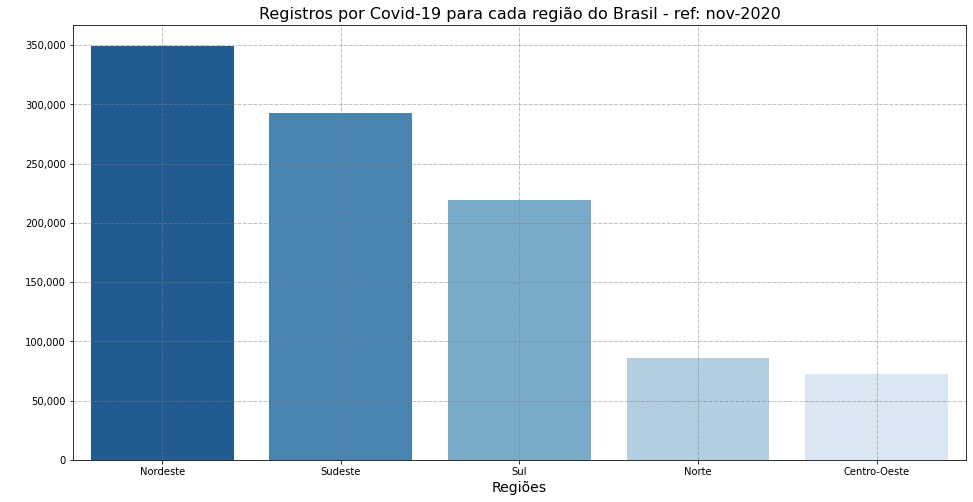

In [ ]:
print_bar_plot(distribuicao_frequencia_regioes.regiao, distribuicao_frequencia_regioes.frequencia, "Blues_r", "Registros por Covid-19 para cada região do Brasil - ref: {}".format(mes_ano_ref), 'Regiões', ' ')

<font color='Orange'>Vamos refletir...</font>
***
Na visualização acima é possível observar que:

*   O Nordeste é a região brasileira com a maior quantidade de registros no dataset utilizado para essa análise, seguida pela região Sudeste. 

<font color='grey'>Questionamentos</font>
***

*   As regiões Nordeste e Sudeste concentram a maior quantidade de casos e mortes confirmadas?

**Vamos analisar a seguir:**
***
*   Número de casos confirmados para cada região.

####Criando um dataframe por região e novas variáveis

In [ ]:
# agrupando o dataset por região, estado e semana epidemiológica
dados_covid_regiao = dados_covid.query("place_type == 'state' ").groupby(by=['regiao','state', 'week_number_of_year']).agg({'order_for_place' : 'max', 'confirmed' : 'max', 'deaths' : 'max', 'estimated_population' : 'max'})
dados_covid_regiao.reset_index(drop=False, inplace=True)
# agrupando o dataset por região e semana epidemiológica
dados_covid_regiao = dados_covid_regiao.groupby(by=['regiao', 'week_number_of_year']).agg({'confirmed' : 'sum', 'deaths' : 'sum', 'estimated_population' : 'sum'})
dados_covid_regiao.reset_index(drop=False, inplace=True)
dados_covid_regiao.head()

regiao  week_number_of_year  confirmed  deaths  estimated_population
0  Centro-Oeste                   10          1       0             3055149.0
1  Centro-Oeste                   11         20       0            12978083.0
2  Centro-Oeste                   12        161       0            16504303.0
3  Centro-Oeste                   13        401       2            16504303.0
4  Centro-Oeste                   14        708      12            16504303.0

In [ ]:
# criando variável confirmed_per_100k_inhabitants
dados_covid_regiao['confirmed_per_100k_inhabitants'] = ((dados_covid_regiao.confirmed / dados_covid_regiao.estimated_population) * 100000).round(2)
# criando variável death_rate
dados_covid_regiao['death_rate'] = ((dados_covid_regiao.deaths / dados_covid_regiao.confirmed) * 100).round(2)
dados_covid_regiao.head()

regiao  ...  death_rate
0  Centro-Oeste  ...        0.00
1  Centro-Oeste  ...        0.00
2  Centro-Oeste  ...        0.00
3  Centro-Oeste  ...        0.50
4  Centro-Oeste  ...        1.69

[5 rows x 7 columns]

In [ ]:
# ordenando dataset pela variável data
dados_covid_regiao.sort_values(by=['regiao', 'week_number_of_year', 'confirmed'], ascending=True, inplace=True)
# criando uma lista com todos os estados no datset
lista_regioes = dados_covid_regiao.regiao.unique()
# criando a lista de lista de todos os novos casos utilizando a função diff para cada regiao
novos_casos = [dados_covid_regiao.query('regiao == @regiao')['confirmed'].diff() for regiao in lista_regioes]
# criando a nova variável [new_cases] no dataframe
dados_covid_regiao['new_cases'] = [item for lista_regioes in novos_casos for item in lista_regioes]
dados_covid_regiao.head()

regiao  week_number_of_year  ...  death_rate  new_cases
0  Centro-Oeste                   10  ...        0.00        NaN
1  Centro-Oeste                   11  ...        0.00       19.0
2  Centro-Oeste                   12  ...        0.00      141.0
3  Centro-Oeste                   13  ...        0.50      240.0
4  Centro-Oeste                   14  ...        1.69      307.0

[5 rows x 8 columns]

In [ ]:
# verificando a quantidade de NaN values na nova coluna
# como temos 5 regioes, devemos ter 5 NaN values
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_regiao.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 5


In [ ]:
# substituíndo valores nulos da variável new_cases por 0.0
dados_covid_regiao.new_cases.fillna(value=0.0, inplace=True)
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_regiao.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 0


####Gerando visualizações

#####Número de casos confirmados

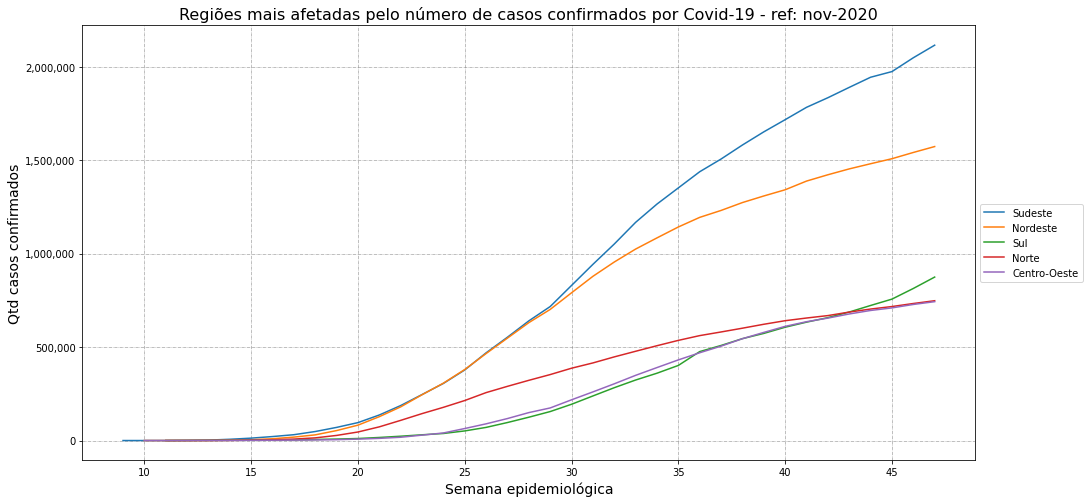

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['confirmed'], ascending=False), 'week_number_of_year', 'confirmed', 'regiao', 'Regiões mais afetadas pelo número de casos confirmados por Covid-19 - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:
* A ordem das regiões por número de casos confirmados é igual a ordem da quantidade de registros por regiões.
* Até a semana 30 (20.07.2020), as regiões Sudeste e Nordeste possuíam números exatamente iguais, assim como as regiões Sul e Centro-Oeste. Logo na semana seguinte, a região Sudeste tem uma crescimento exponencial no número de casos confirmados.

<font color='salmon'>Respostas</font>
***
* Será que as regiões Nordeste e Sudeste concentram a maior quantidade de casos e mortes confirmadas? **Até agora conseguimos confirmar que ambas regiões possuem a maior quantidade de casos confirmados do país.**

<font color='grey'>Questionamentos</font>
***

* Será que o número de mortes confirmadas também segue esta ordem (Sudeste, Nordeste, Sul, Norte e Centro-Oeste)?
* Será que a partir da semana 30 (20.07.2020) foi quando os estados da região Sudeste iniciaram a flexibilização das regras de distanciamento social e isso ocasionou o aumento do número de casos confirmados?

**Vamos analisar a seguir**
***
*   O número de mortes confirmadas para cada região.

#####Número de mortes confirmadas

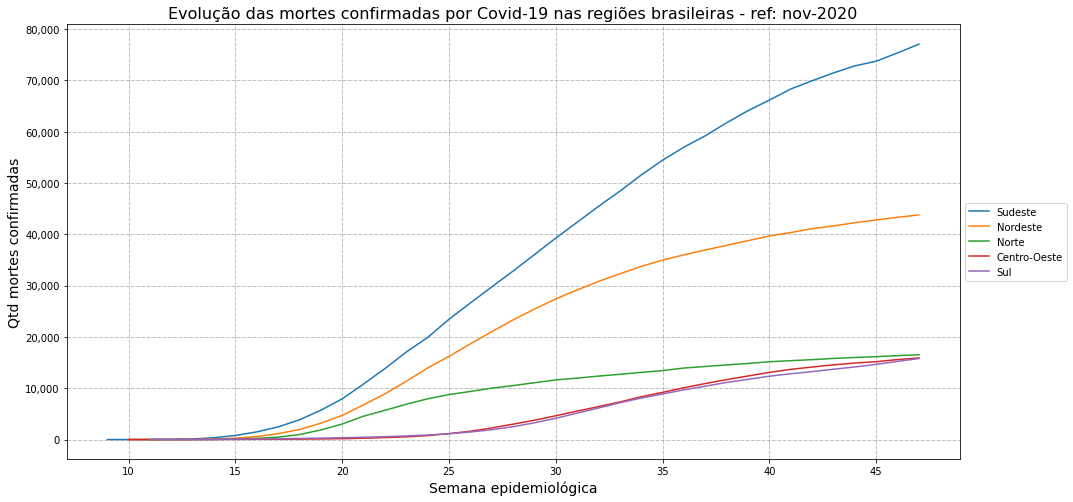

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['deaths'], ascending=False), 'week_number_of_year', 'deaths', 'regiao', 'Evolução das mortes confirmadas por Covid-19 nas regiões brasileiras - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd mortes confirmadas')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Apesar de no número de casos confirmados para as regiões Sudeste e Nordeste serem iguais, o número de mortes para o Nordeste sempre se manteve abaixo do número de mortes registradas para o Sudeste.
* As regiões Centro-Oeste e Sul possuem um comportamento muito semelhante ao no número de mortes.

<font color='Salmon'>Respostas</font>
***

* Será que as regiões Nordeste e Sudeste concentram a maior quantidade de casos e mortes confirmadas? **Agora é possível afirmar que ambas regiões possuem a maior quantidade de casos e mortes confirmadas do país.**

* Será que o número de mortes confirmadas também segue esta ordem (Sudeste, Nordeste, Sul, Norte e Centro-Oeste)? **O número de mortes confirmadas não segue a mesma ordem das regiões com casos confirmados, ou seja, podemos assumir que o número de casos confirmados não está diretamente relacionado ao número de mortes.**

* Será que a partir da semana 30 (20.07.2020) foi quando os estados da região Sudeste iniciaram a flexibilização das regras de distanciamento social e isso ocasionou o aumento do número de casos confirmados? **As medidas de flexibilização do isolamento social iniciaram em junho.**

> [01.06.2020 - Vai ser ''um massacre'', diz ex-diretor da Saúde sobre flexibilizar isolamento](https://www.correiobraziliense.com.br/app/noticia/brasil/2020/06/01/interna-brasil,859985/vai-ser-massacre-diz-ex-diretor-da-saude-sobre-flexibilizar-isolamento.shtml)

> [06.06.2020 - Governo do RJ decreta flexibilização das medidas de isolamento a partir deste sábado](https://g1.globo.com/jornal-nacional/noticia/2020/06/06/governo-do-rj-decreta-flexibilizacao-das-medidas-de-isolamento-a-partir-deste-sabado-6.ghtml)

> [22.06.2020 - Estados do Brasil estão retomando atividades](https://correio.rac.com.br/_conteudo/2020/06/mundo/954571-estados-do-brasil-estao-retomando-atividades.html)

> [14.07.2020 - Covid 19: Plano de flexibilização malfeito pode levar a explosão de casos](https://www.correiobraziliense.com.br/app/noticia/brasil/2020/07/14/interna-brasil,871890/covid-19-plano-de-flexibilizacao-pode-levar-a-explosao-de-casos.shtml)

<font color='grey'>Questionamentos</font>
***

* Por que a região Nordeste possuí um número de mortes menor que a região Sudeste?

**Vamos analisar a seguir**
***
*   O número de casos confirmados por 100 mil habitantes para cada região

#####Número de casos confirmados por 100 mil habitantes

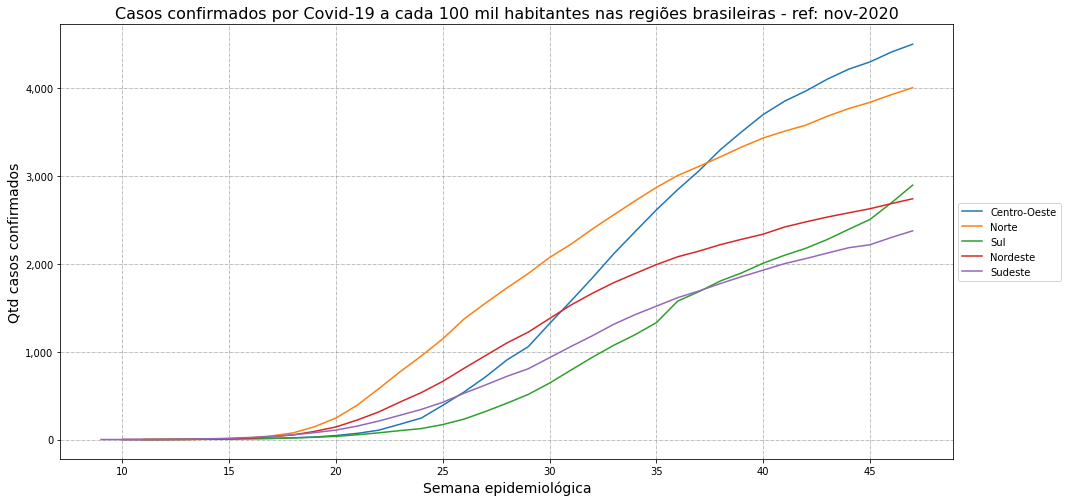

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['confirmed_per_100k_inhabitants'], ascending=False), 'week_number_of_year', 'confirmed_per_100k_inhabitants', 'regiao', 'Casos confirmados por Covid-19 a cada 100 mil habitantes nas regiões brasileiras - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* O impacto a cada 100 mil habitantes nas regiões Centro-Oeste e Norte é praticamente o dobro que a região Sudeste.
* A curva no aumento de casos confirmados para a região Centro-Oeste está em ascensão e ultrapassou a região Norte após a semana 35 (24.09.2020).

<font color='salmon'>Respostas</font>
***
* Por que a região Nordeste possuí um número de mortes menor que a região Sudeste? **O Nordeste possuí menos habitantes que o Sudeste e que nesta região o Covid-19 espalhou-se principalmente nas periferias das capitais, aumentando número de mortes das pessoas em situação vulnerável. Na minha opinião, as pessoas que possuíam um maior poder aquisitivo conseguiram adotar as medidas de prevenção, como o uso de máscaras e manter o distanciamento social, evitando assim um aumento no número de mortes nesta região. Para conseguirmos chegar a conclusões baseadas em dados, seria necessário comparar as informações dos municípios de cada região e realizar a captura de outros dados, por exemplo população.**

>[Região Nordeste ultrapassa o Sudeste em número de casos de Covid](https://g1.globo.com/jornal-nacional/noticia/2020/06/11/regiao-nordeste-ultrapassa-o-sudeste-em-numero-de-casos-de-covid.ghtml)

<font color='grey'>Questionamentos</font>
***
* O que aconteceu na região Centro-Oeste que possa explicar este aumento no número de casos confirmados a partir da semana 35 (24.08.2020)?

**Vamos analisar a seguir**
***
*   A evolução de novos casos confirmados cada região

#####Evolução de novos casos confirmados

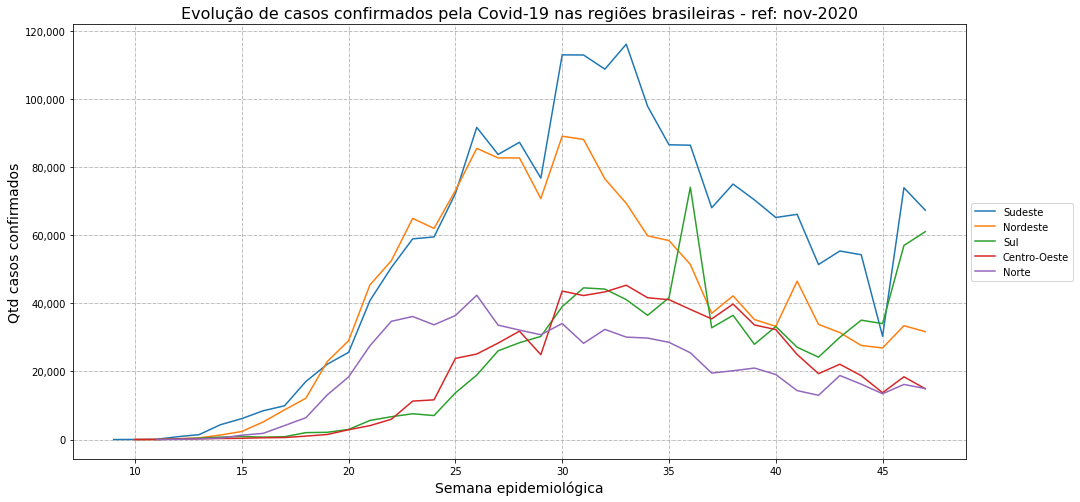

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['new_cases'], ascending=False), 'week_number_of_year', 'new_cases', 'regiao', 'Evolução de casos confirmados pela Covid-19 nas regiões brasileiras - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Antes da semana 30 (20.07.2020), todas as regiões, exceto a região Norte, registraram queda no número de casos confirmados. Porém, na semana 30 todas as regiões apresentaram um aumento significativo no número de casos confirmados.
* Após a semana 35 (24.08.2020), a região Sul apresenta um aumento no número de casos confirmados, subindo de 40.000 para mais de 70.000 casos confirmados.
* A região Nordeste que vinha diminuindo o número de casos confirmados até a semana 40 (28.09.2020) volta a registrar um aumento no número de casos confirmados.
* A região Sudeste, que estava em constante queda no número de casos confirmados até a semana 45 (02.11.2020) está atualmente em ascensão no número de casos confirmados.

<font color='salmon'>Respostas</font>
***
* O que aconteceu na região Centro-Oeste que possa explicar este aumento no número de casos confirmados a partir da semana 35 (24.08.2020)? **Não foi possível encontrar nenhuma notícia que explicasse o aumento no número de casos confirmados.**

> [Em agosto, MT registrou 39.114 novos casos de Covid-19 e 935 mortes em decorrência da doença](https://g1.globo.com/mt/mato-grosso/noticia/2020/08/31/em-agosto-mt-registrou-39114-novos-casos-de-covid-19-e-935-mortes-em-decorrencia-da-doenca.ghtml)

<font color='grey'>Questionamentos</font>
***

* O que aconteceu que poderia explicar o aumento nos números de casos confirmados em todas as regiões brasileiras?

**Vamos analisar a seguir**
***

* A evolução da taxa de mortalidade par cada região

#####Evolução da taxa de mortalidade

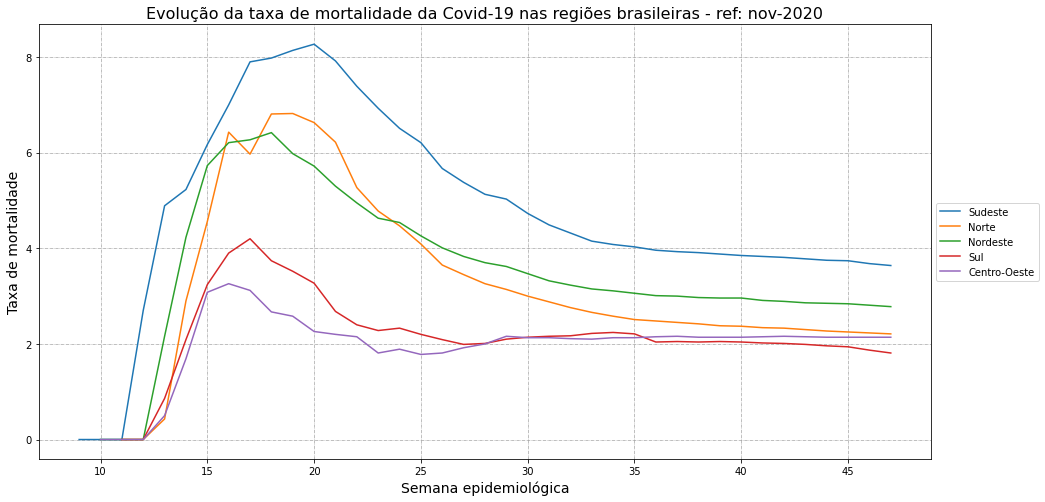

In [ ]:
print_line_plot(dados_covid_regiao.sort_values(by=['death_rate'], ascending=False), 'week_number_of_year', 'death_rate', 'regiao', 'Evolução da taxa de mortalidade da Covid-19 nas regiões brasileiras - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Taxa de mortalidade')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que : 

* Para todas as regiões a maior taxa de mortalidade por Covid-19 foi entre a semana 15 (06.04.2020) e 20 (11.05.2020).
* As regiões Sudeste, Norte e Nordeste possuem as maiores taxas de mortalidade por Covid-19 entre as semanas 15 e 20.

<font color='salmon'>Respostas</font>
***
* O que aconteceu que poderia explicar o aumento nos números de casos confirmados em todas as regiões brasileiras? **Na matéria a seguir é possível entender as causas e os motivos pelos quais as taxas de novos casos cresceram no Brasil.**

> [Três motivos que explicam por que casos de Covid-19 voltaram a crescer no Brasil](https://g1.globo.com/bemestar/coronavirus/noticia/2020/07/31/tres-motivos-que-explicam-por-que-casos-de-covid-19-voltaram-a-crescer-no-brasil.ghtml)

**Vamos analisar a seguir**
***
*   O número de casos confirmados para todos os estados.

###Análise por Estados

####Criando um dataframe por estados e novas variáveis

In [ ]:
# criando cópia do dataset
dados_covid_estados = dados_covid.copy()
# realizando query para selecionar somente os estados
dados_covid_estados = dados_covid_estados.query("place_type == 'state' ")
# deletando a variável city
dados_covid_estados.drop('city', axis= 1, inplace= True)
dados_covid_estados.head()

date state place_type  confirmed  ...  month  month_abrev  uf_code  regiao
0 2020-11-21    AP      state      56236  ...     11          nov       16   Norte
1 2020-11-20    AP      state      56085  ...     11          nov       16   Norte
2 2020-11-19    AP      state      55885  ...     11          nov       16   Norte
3 2020-11-18    AP      state      55652  ...     11          nov       16   Norte
4 2020-11-17    AP      state      55382  ...     11          nov       16   Norte

[5 rows x 17 columns]

In [ ]:
# ordenando dataset pela variável data
dados_covid_estados.sort_values(by=['state','date'], ascending=True, inplace=True)
# criando uma lista com todos os estados no datset
lista_estados = dados_covid_estados.state.unique()
# criando a lista de lista de todos os novos casos utilizando a função diff para cada estado
novos_casos = [dados_covid_estados.query('state == @estado')['confirmed'].diff() for estado in lista_estados]
# criando a nova variável [new_cases] no dataframe
dados_covid_estados['new_cases'] = [item for lista_estados in novos_casos for item in lista_estados]
dados_covid_estados.head()

date state place_type  ...  uf_code  regiao  new_cases
3799 2020-03-17    AC      state  ...       12   Norte        NaN
3798 2020-03-18    AC      state  ...       12   Norte        0.0
3797 2020-03-19    AC      state  ...       12   Norte        1.0
3796 2020-03-20    AC      state  ...       12   Norte        3.0
3795 2020-03-21    AC      state  ...       12   Norte        4.0

[5 rows x 18 columns]

In [ ]:
# ajustando a variável taxa de mortalidade
dados_covid_estados['death_rate'] = ((dados_covid_estados.deaths / dados_covid_estados.confirmed) * 100).round(2)

In [ ]:
# verificando a quantidade de NaN values na nova coluna
# como temos 27 estados, devemos ter 27 NaN values
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_estados.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 27


In [ ]:
# substituíndo valores nulos da variável new_cases por 0.0
dados_covid_estados.new_cases.fillna(value=0.0, inplace=True)
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_estados.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 0


In [ ]:
# utilizando a função tabela_frquencia para criar a tabela de frequencia por estados
distribuicao_frequencia_estados = tabela_frequencia(dados_covid_estados.state, 'uf')
distribuicao_frequencia_estados

uf  frequencia  percentual
0   SP         265        3.92
1   ES         261        3.86
2   DF         259        3.83
3   BA         259        3.83
4   MG         257        3.80
5   AL         256        3.79
6   GO         255        3.77
7   PE         255        3.77
8   SC         255        3.77
9   PB         255        3.77
10  PR         253        3.74
11  RS         253        3.74
12  MS         252        3.73
13  RJ         252        3.73
14  CE         251        3.71
15  AC         250        3.70
16  PA         249        3.68
17  AM         249        3.68
18  PI         248        3.67
19  MA         247        3.65
20  TO         244        3.61
21  MT         244        3.61
22  AP         243        3.60
23  SE         242        3.58
24  RR         241        3.57
25  RO         238        3.52
26  RN         226        3.34

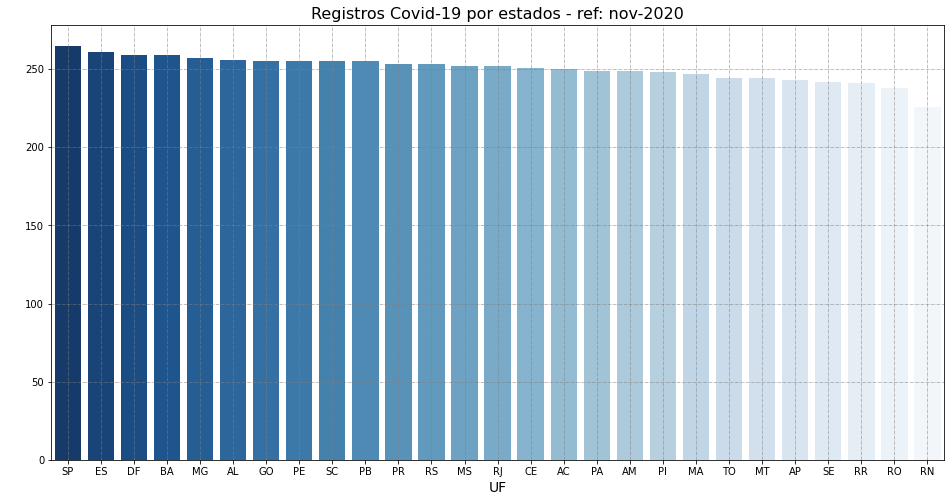

In [ ]:
print_bar_plot(distribuicao_frequencia_estados.uf, distribuicao_frequencia_estados.frequencia, "Blues_r", 'Registros Covid-19 por estados - ref: {}'.format(mes_ano_ref), 'UF', ' ')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que a quantidade de registros entre os estados é semelhante

<font color='grey'>Questionamentos</font>
***

*   Será que os estados com a maior quantidade de registros também são os estados com o maior número de casos e mortes confirmadas?

**Vamos analisar a seguir**
***
*   Quais os estados que possuem o maior número de casos e mortes confirmadas?
*   Qual o estado que possuem o maior número de casos e mortes confirmada para cada região?
*   Quais os estados que possuem o maior número de casos confirmados por 100.000 habitantes?
*   Qual o estado que possuem o maior número de casos confirmados por 100.000 habitantes para cada região?
*   Quais os estados que possuem a maior taxa de mortalidade?
*   Qual o estado que possuí a maior taxa de mortalidade para cada região?



####Gerando visualizações

#####Número de casos confirmados

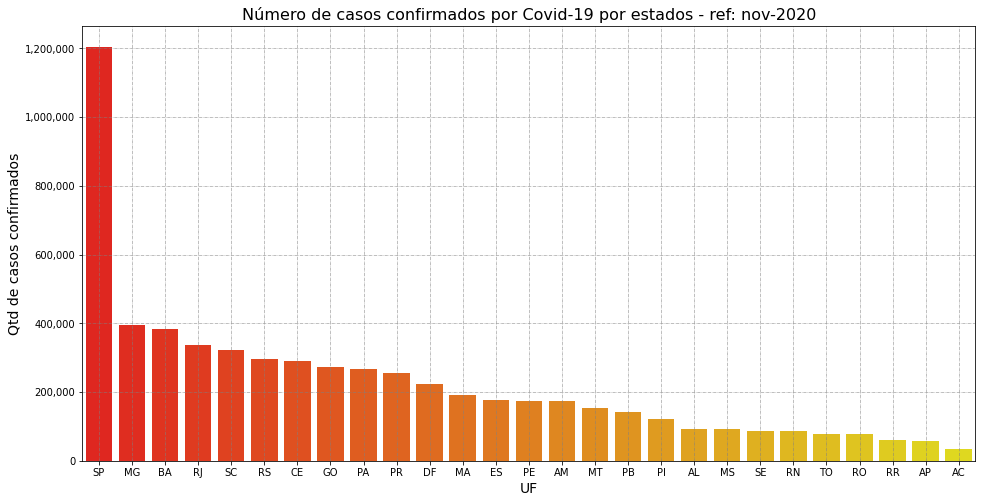

In [ ]:
print_bar_plot(dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state, dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed, 'autumn', 'Número de casos confirmados por Covid-19 por estados - ref: {}'.format(mes_ano_ref), 'UF', 'Qtd de casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* O estado de São Paulo (SP) é o estado com maior número de casos confirmados no Brasil. Seguido por Minas Gerais (MG), Bahia (BA), Rio de Janeiro (RJ) e Santa Catarina (SC), estes completam a lista dos 5 estados com maior número de casos confirmados no país.
* Quando comparamos o estado de São Paulo (SP) a Minas Gerais (MG), o estado de São Paulo (SP) possuí quase três vezes mais o número de casos que Minas Gerais (MG). Já quando comparamos o estado de Minas Gerais (MG) e Bahia (BA), observe que eles possuem o número semelhante de casos confirmados.

<font color='grey'>Questionamentos</font>
***
*  O motivo de São Paulo (SP) ser o estado com maior número de mortes é por ele ser o estado mais populoso ou por que a população não adotou medidas de distânciamente social?

**Vamos analisar a seguir**
***
*   O número de mortes confirmadas para todos os estados

#####Número de mortes confirmadas

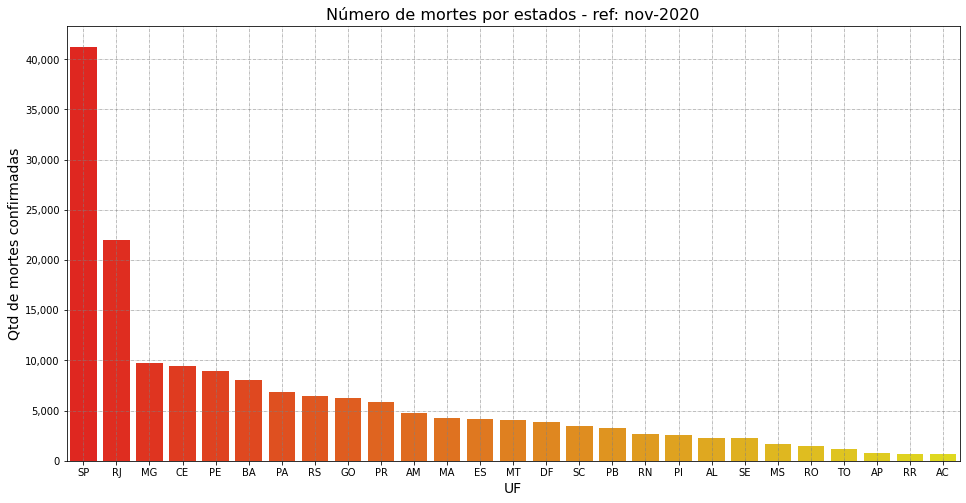

In [ ]:
print_bar_plot(dados_covid_estados.query("is_last == True").sort_values(by=['deaths'], ascending=False).state,dados_covid_estados.query("is_last == True").sort_values(by=['deaths'], ascending=False).deaths, 'autumn', 'Número de mortes por estados - ref: {}'.format(mes_ano_ref), 'UF', 'Qtd de mortes confirmadas')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Aqui temos alguns pontos importantes que devemos comentar:

* O estado de São Paulo (SP) confirmar-se com o estado com o maior número de casos e mortes do Brasil.
* O segundo estado com maior número de mortes não é Minas Gerais (MG), mas Rio de Janeiro (RJ) que na visualização (Número de casos confirmados por Covid-19 por estados) é o 4° estado com o maior número de casos registrados.
* Aqui há um comportamento estranho, os estados de Santa Catarina (SC) e Pernambuco (PE) que ocupam 5° e 13° posições respectivamente no número de casos confirmados, possuem um comportamento diferente no número de mortes. O estado de Pernambuco (PE) é o 5° estado com maior número de mortes, enquanto Santa Catarina (SC) ocupa a 16° posição.

<font color='grey'>Questionamentos</font>
***

*   Por que o estado de São Paulo (SP) é o estado com maior número de casos e mortes confirmadas? Será que esses números estão relacionados ao tamanho da população por estados?
*   O que aconteceu nos casos onde a posição dos estados inverteu, por exemplo, Minas Gerais (MG) e Rio de Janeiro (RJ)?
*   Os estados não estão reportando os números de forma correta, a população não está procurando assistência médica ou os estados adotaram medidas mais restritivas?
*   O que aconteceu com os estados de Pernambuco (PE) e Santa Catarina (SC) para terem o comportamento acima?

<font color='salmon'>Respostas</font>
***
* O motivo de São Paulo (SP) ser o estado com maior número de mortes é por ele ser o estado mais populoso ou por que a população não adotou medidas de distânciamente social? **Assim como nos estados da região Nordeste, São Paulo (SP) concentra número de casos e mortes confirmas por Covid-19 nas periferias.**

> [São Paulo: Periferias concentram maior número de mortes e casos da Covid-19](https://jovempan.com.br/programas/jornal-da-manha/periferias-sp-concentram-mortes-casos-coronavirus.html)

**Vamos analisar a seguir**
***

*   O número de casos e mortes confirmadas para todos os estados separados por regiões.



#####Estados por regiões

######Sudeste

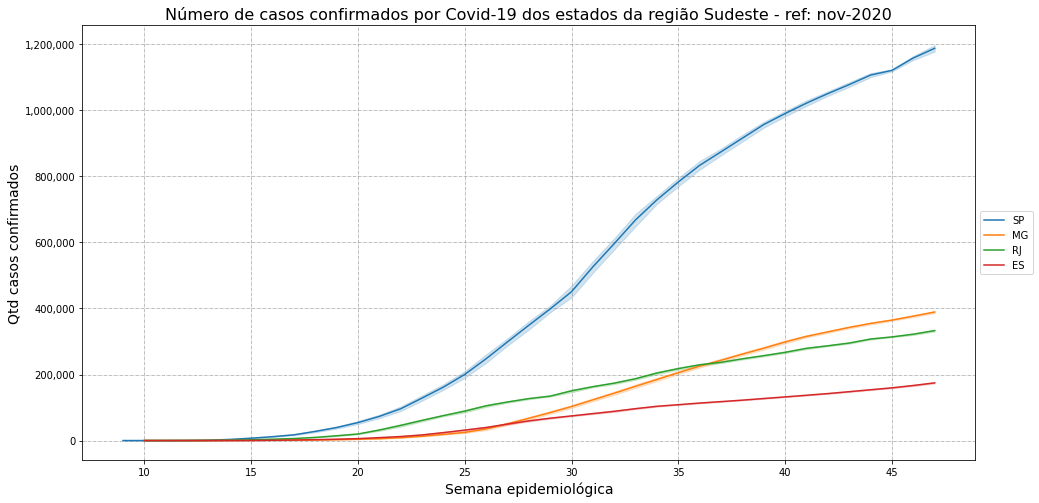

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sudeste'").sort_values(by=['confirmed'], ascending=False), 'week_number_of_year', 'confirmed', 'state', 'Número de casos confirmados por Covid-19 dos estados da região Sudeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

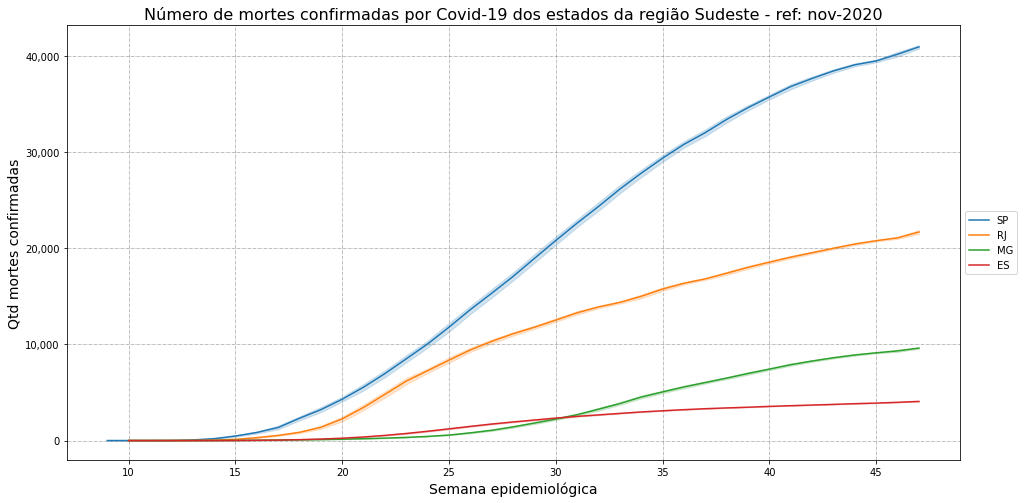

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sudeste'").sort_values(by=['deaths'], ascending=False), 'week_number_of_year', 'deaths', 'state', 'Número de mortes confirmadas por Covid-19 dos estados da região Sudeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd mortes confirmadas')

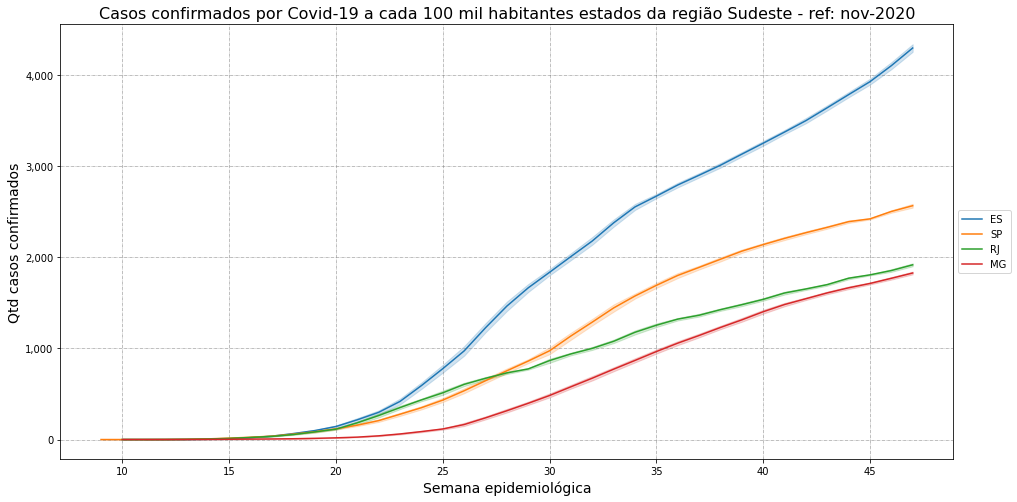

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sudeste'").sort_values(by=['confirmed_per_100k_inhabitants'], ascending=False), 'week_number_of_year', 'confirmed_per_100k_inhabitants', 'state', 'Casos confirmados por Covid-19 a cada 100 mil habitantes estados da região Sudeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

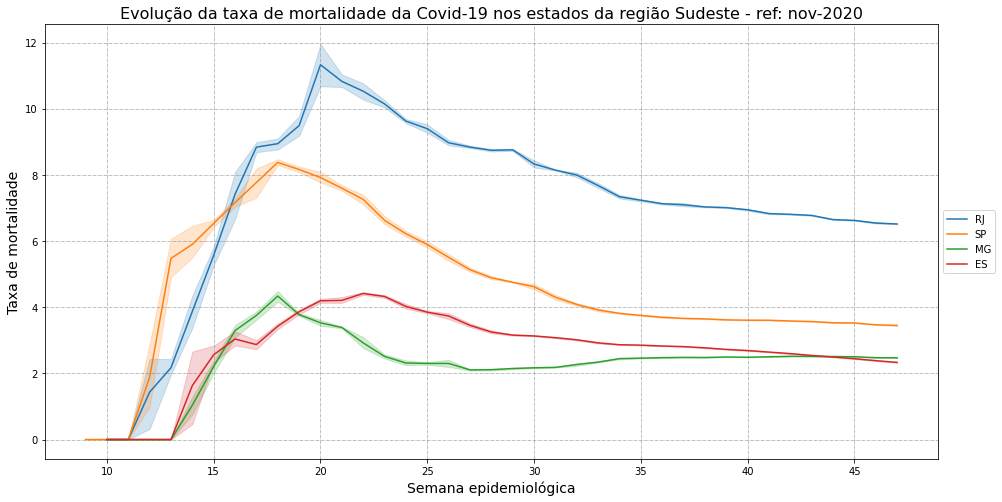

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sudeste'").sort_values(by=['death_rate'], ascending=False), 'week_number_of_year', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Sudeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Taxa de mortalidade')

<font color='red'>Observação</font>
***
A fim de melhor a visualização dos dados sobre a taxa de mortalidade a figura abaixo foi alterada de semana epidemiológica para dias

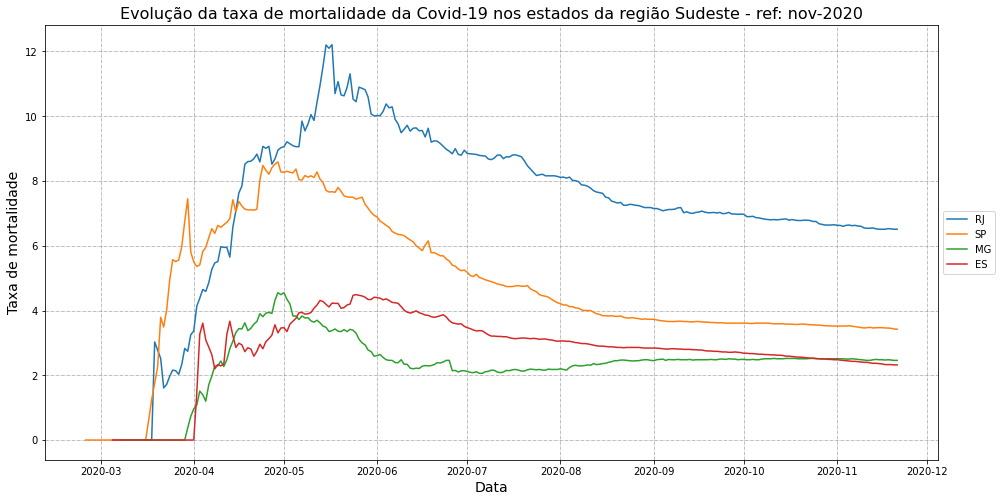

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sudeste'").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Sudeste - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* O estado de São Paulo (SP) é o estado com maior número de mortes e casos confirmados da região Sudeste, entretanto, quando avaliamos a número de mortes a cada 100 mil habitantes, o estado do Espírito Santo (ES) ultrapassa São Paulo (SP).
* O estado do Rio de Janeiro (RJ) possuí a maior taxa de mortalidade por Covid-19 da região Sudeste.
* O comportamento observado quando realizamos a análise por região é semelhante ao comportamento do estado de São Paulo (SP), onde há um aumento exponencial na curva de casos confirmados a partir da semana 30 (20.07.2020). 
* A taxa de mortalidade de todos os estados está em declínio.

<font color='grey'>Questionamentos</font>
***

*  Considerando que a taxa de mortalidade está em declínio, isso significa que a região sudeste atingiu a ["imunidade de rebanho"](https://open.spotify.com/episode/3LvTbLNq9mH9C5577ZSqPg)?

**Vamos analisar a seguir**
***
*  Os estados da região Nordeste.

######Nordeste

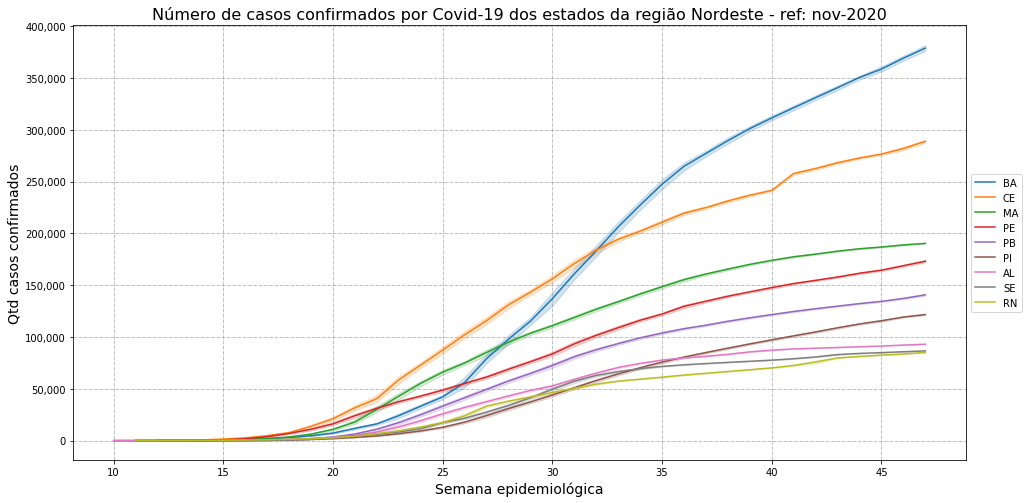

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Nordeste'").sort_values(by=['confirmed'], ascending=False), 'week_number_of_year', 'confirmed', 'state', 'Número de casos confirmados por Covid-19 dos estados da região Nordeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

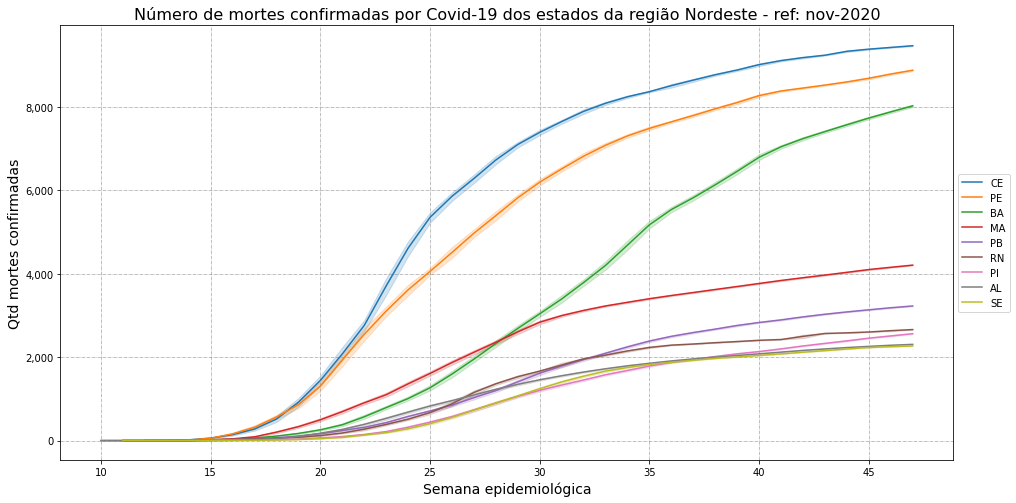

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Nordeste'").sort_values(by=['deaths'], ascending=False), 'week_number_of_year', 'deaths', 'state', 'Número de mortes confirmadas por Covid-19 dos estados da região Nordeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd mortes confirmadas')

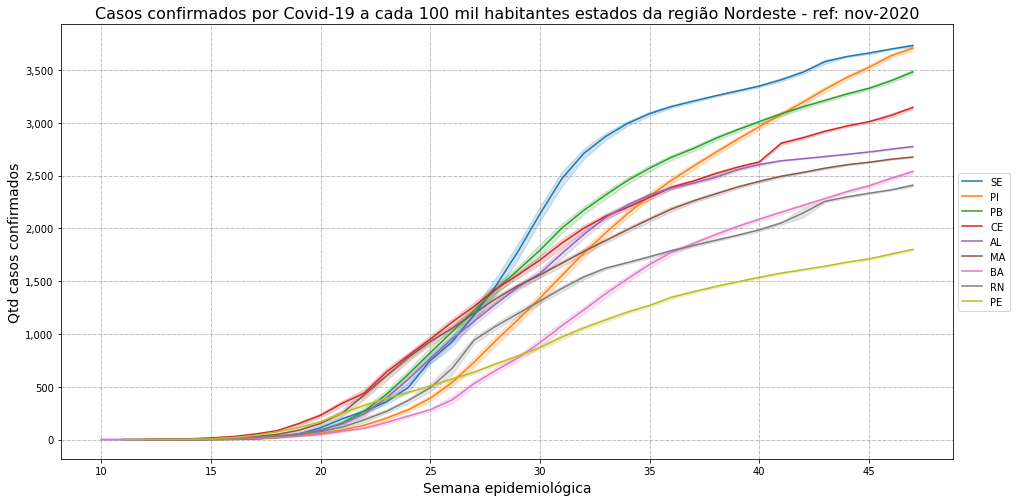

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Nordeste'").sort_values(by=['confirmed_per_100k_inhabitants'], ascending=False), 'week_number_of_year', 'confirmed_per_100k_inhabitants', 'state', 'Casos confirmados por Covid-19 a cada 100 mil habitantes estados da região Nordeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

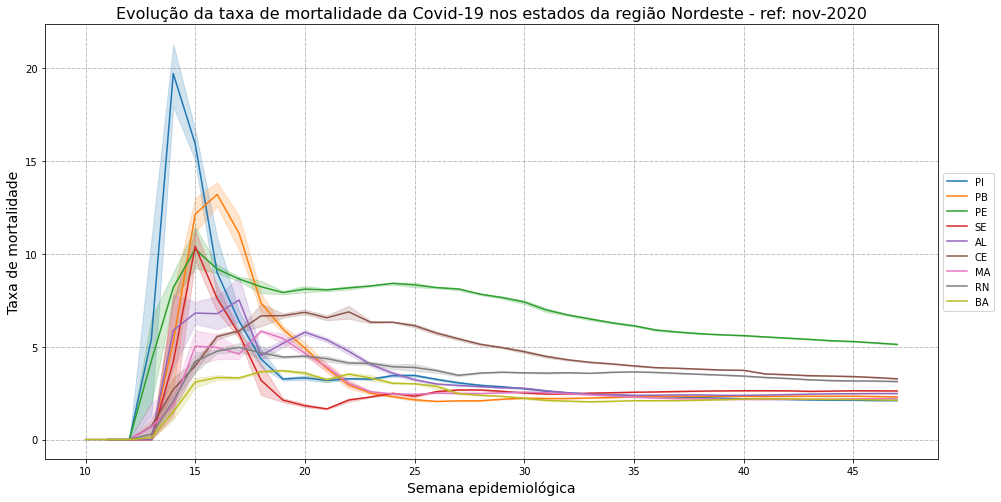

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Nordeste'").sort_values(by=['death_rate'], ascending=False), 'week_number_of_year', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Nordeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Taxa de mortalidade')

<font color='red'>Observação</font>
***
A fim de melhor a visualização dos dados sobre a taxa de mortalidade a figura abaixo foi alterada de semana epidemiológica para dias

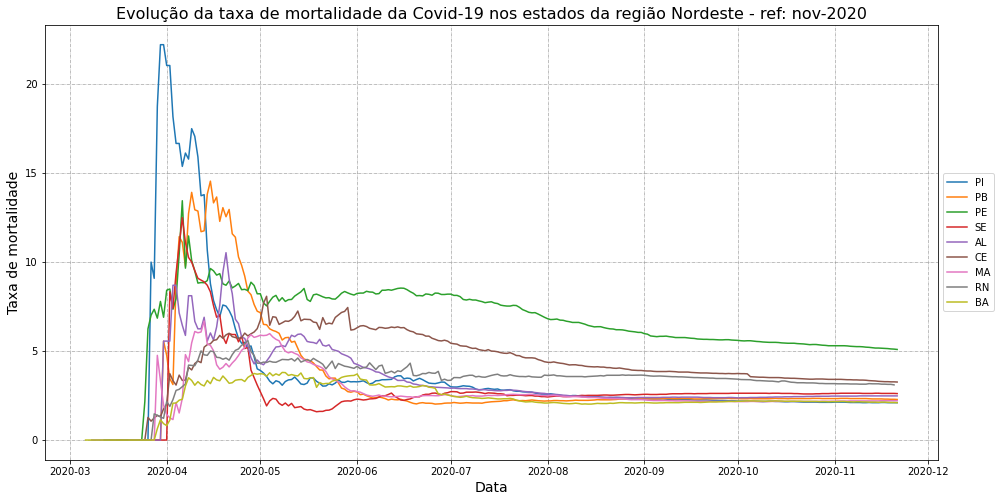

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Nordeste'").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Nordeste - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

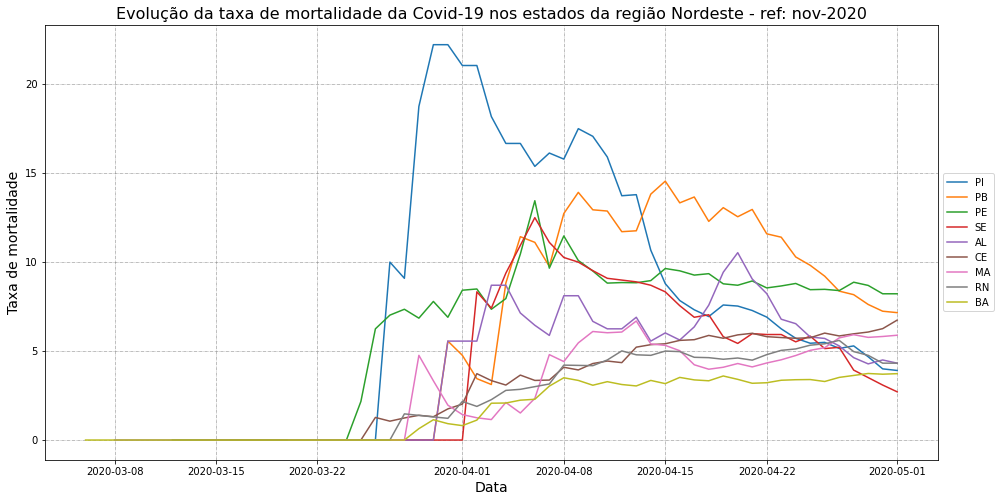

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Nordeste' and date <= '2020-05-01' ").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Nordeste - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Nos estados da região Nordeste há um comportamento atípico. A Bahia (BA) é o estado com maior número de casos registrados, o Ceará (CE) possuí o maior número de mortes registradas, Sergipe (SE) é o estado com maior número de casos registrados por 100 mil habitantes e o Piauí (PI) é o estado com a maior taxa de mortalidade da região Nordeste.
* O estado da Bahia (BA) iniciou um aumento exponencial a partir da semana 25 (15.06.2020) e ultrapassou o estado do Ceará (CE) entre as semanas 30 e 35.
* Diferente da região Sudeste, que apresentou a maior taxa de mortalidade entre a partir da semana 15 (06.04.2020), os estados da região nordeste registraram o aumento na taxa de mortalidade entre a semana 10 e 15.

<font color='salmon'>Respostas</font>
***
* Considerando que a taxa de mortalidade está em declínio, isso significa que a região sudeste atingiu a "imunidade de rebanho"? **Mesmo que o estado de São Paulo (SP) tenha alcançado a imunidade de rebanho, de acordo com a pesquisa, ela pode durar poucos meses devido aos casos de reinfecção por Covid-19.**

> [Covid: imunidade de rebanho pode durar poucos meses, diz estudo da USP](https://www.uol.com.br/vivabem/noticias/agencia-estado/2020/09/23/covid-imunidade-de-rebanho-pode-durar-poucos-meses-diz-estudo-da-usp.htm)

<font color='grey'>Questionamentos</font>
***

*  O que aconteceu no início da pandemia no Nordeste que fez a região registrar altas taxas de mortalidade? A população não estava realizando distanciamento social ou o sistema de saúde entrou em colapso?

**Vamos analisar a seguir**
***
*  Os estados da região Sul.

######Sul

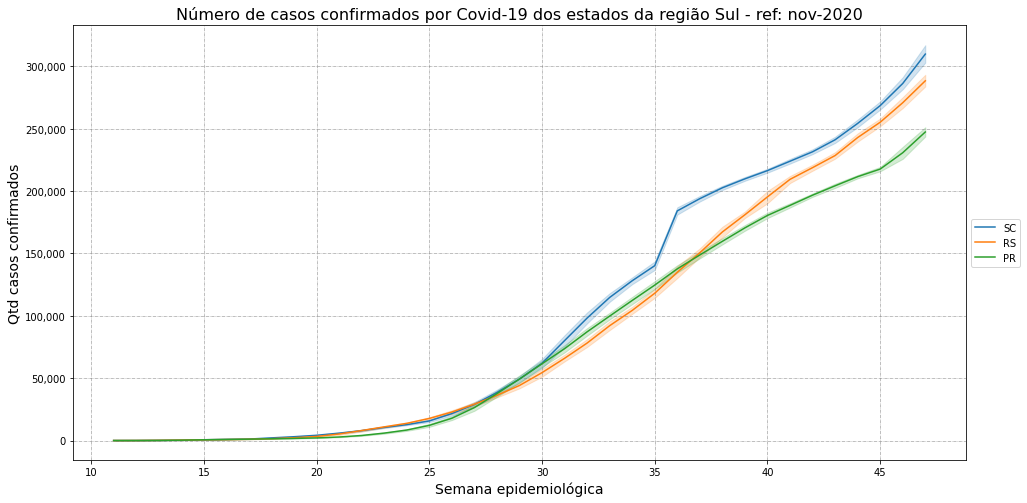

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sul'").sort_values(by=['confirmed'], ascending=False), 'week_number_of_year', 'confirmed', 'state', 'Número de casos confirmados por Covid-19 dos estados da região Sul - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

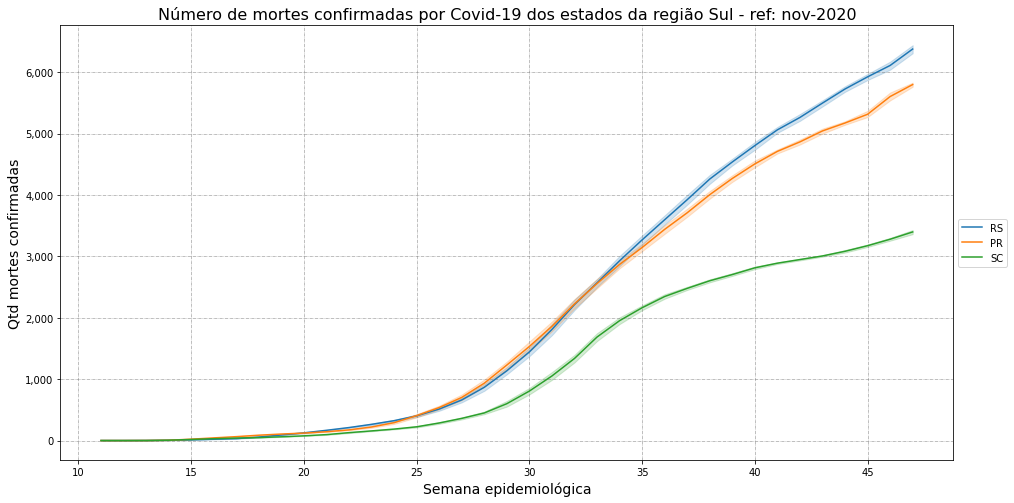

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sul'").sort_values(by=['deaths'], ascending=False), 'week_number_of_year', 'deaths', 'state', 'Número de mortes confirmadas por Covid-19 dos estados da região Sul - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd mortes confirmadas')

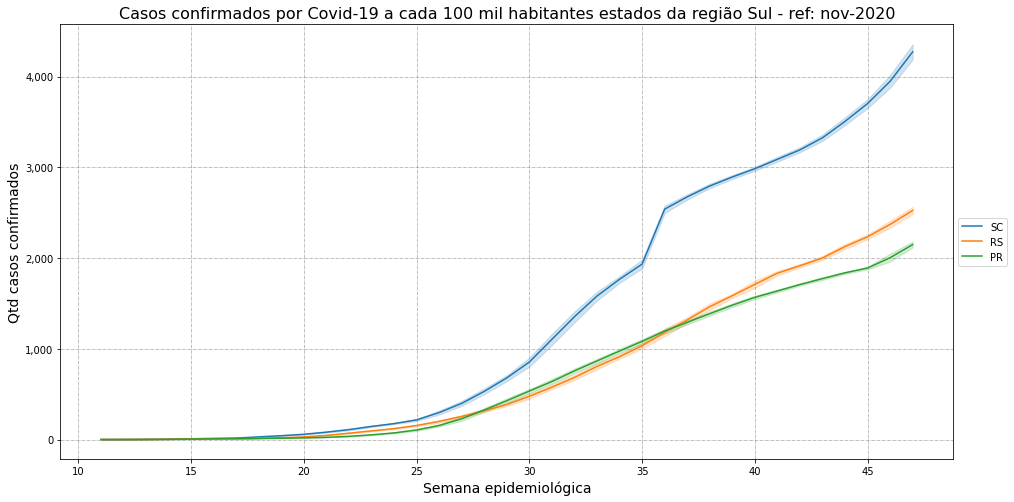

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sul'").sort_values(by=['confirmed_per_100k_inhabitants'], ascending=False), 'week_number_of_year', 'confirmed_per_100k_inhabitants', 'state', 'Casos confirmados por Covid-19 a cada 100 mil habitantes estados da região Sul - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

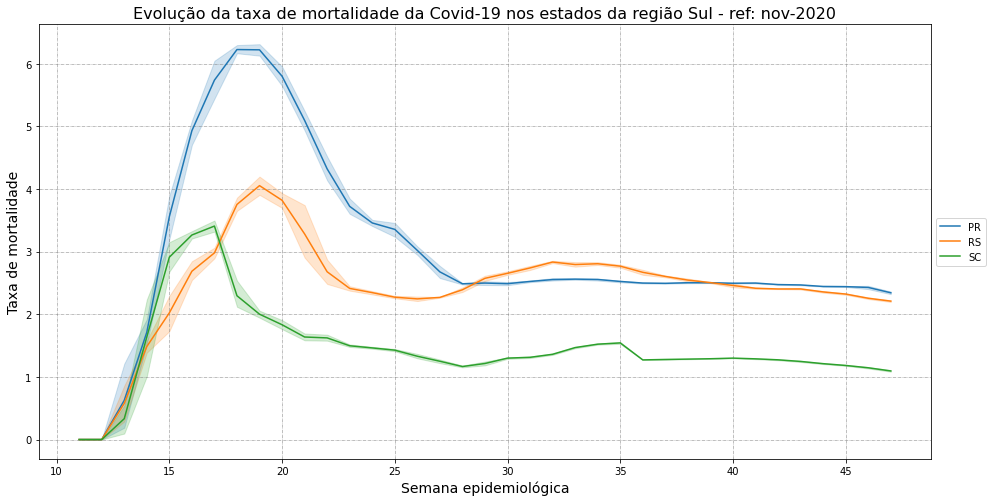

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sul'").sort_values(by=['death_rate'], ascending=False), 'week_number_of_year', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Sul - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Taxa de mortalidade')

<font color='red'>Observação</font>
***
A fim de melhor a visualização dos dados sobre a taxa de mortalidade a figura abaixo foi alterada de semana epidemiológica para dias


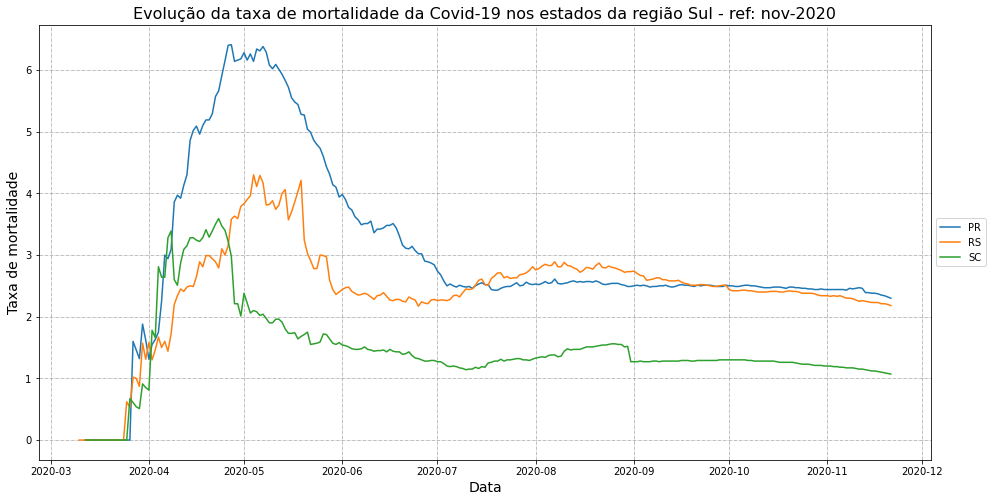

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Sul'").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Sul - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Santa Catarina (SC) é estado com maior número de casos registrados e casos registrados por 100 mil habitantes. Enquanto o Rio Grande do Sul (RS) é o estado com maior número de mortes registradas e o PR possuí a maior taxa de mortalidade da região Sul.
* Assim como nos estados analisados anteriormente, os estados da região Sul registraram a maiores taxas de mortalidade entre a semana 15 e 20, porém a curva é mais suave quando comparada com os estados da região Nordeste.

<font color='salmon'>Respostas</font>
***

* O que aconteceu no início da pandemia no Nordeste que fez a região registrar altas taxas de mortalidade? A população não estava realizando distanciamento social ou o sistema de saúde entrou em colapso?

> *“O Norte e o Nordeste são as regiões socioeconomicamente menos desenvolvidas do país e apresentam taxas de mortalidade maiores que as demais. Estudos anteriores mostram que locais menos desenvolvidos observaram o ritmo mais acelerado de aumento da mortalidade por doenças cardiovasculares nos últimos anos.”*

**Este trecho foi retirado da reportagem abaixo, que explica a vulnerabilidade dos habitantes das regiões Norte e Nordeste.**

> [Alta taxa de morbidades pode aumentar letalidade da covid-19 entre população nordestina](https://www.ufrn.br/imprensa/noticias/36923/alta-taxa-de-morbidades-pode-aumentar-letalidade-da-covid-19-entre-populacao-nordestina)

<font color='grey'>Questionamentos</font>
***

*  O que aconteceu com o estado do Paraná (PR) para a sua taxa de mortalidade ser maior que a taxa de Santa Catarina (SC) e Rio Grande do Sul (RS)?
*  Por que Santa Catarina (SC) tem a maior taxa de casos confirmados, mas a menor e número de mortes confirmadas?

**Vamos analisar a seguir**
***
*  Os estados da região Norte.

######Norte

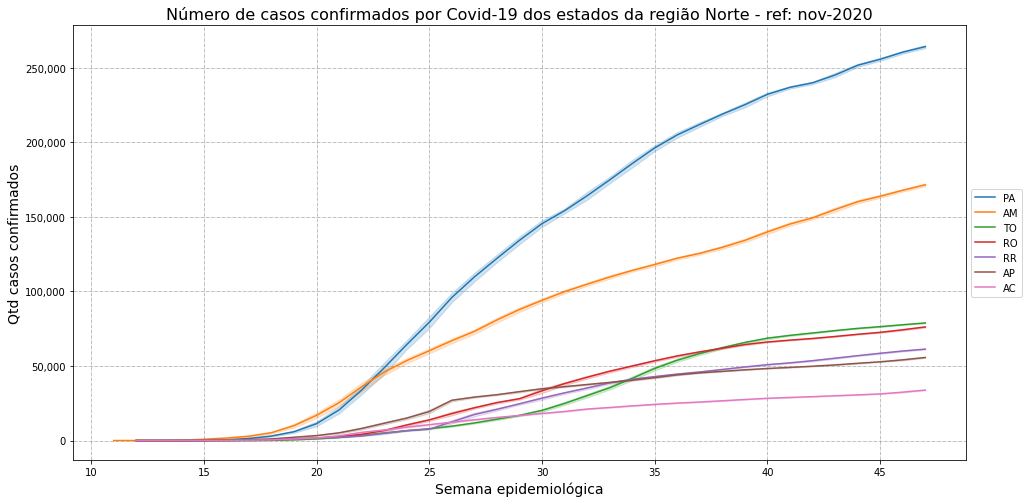

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Norte'").sort_values(by=['confirmed'], ascending=False), 'week_number_of_year', 'confirmed', 'state', 'Número de casos confirmados por Covid-19 dos estados da região Norte - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

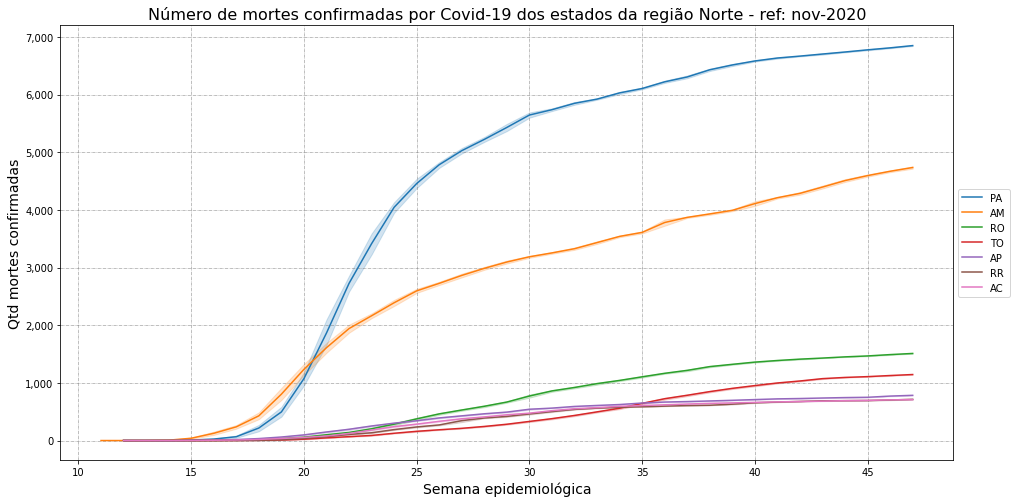

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Norte'").sort_values(by=['deaths'], ascending=False), 'week_number_of_year', 'deaths', 'state', 'Número de mortes confirmadas por Covid-19 dos estados da região Norte - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd mortes confirmadas')

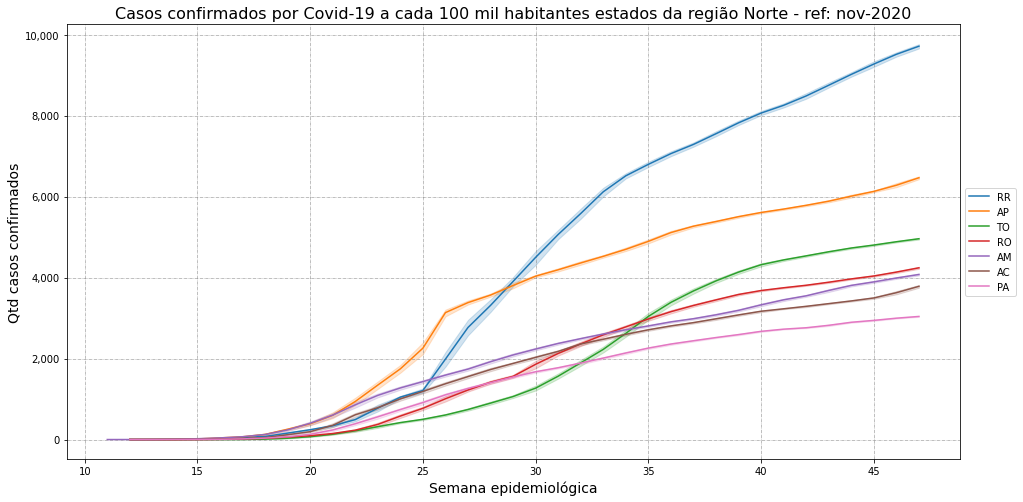

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Norte'").sort_values(by=['confirmed_per_100k_inhabitants'], ascending=False), 'week_number_of_year', 'confirmed_per_100k_inhabitants', 'state', 'Casos confirmados por Covid-19 a cada 100 mil habitantes estados da região Norte - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

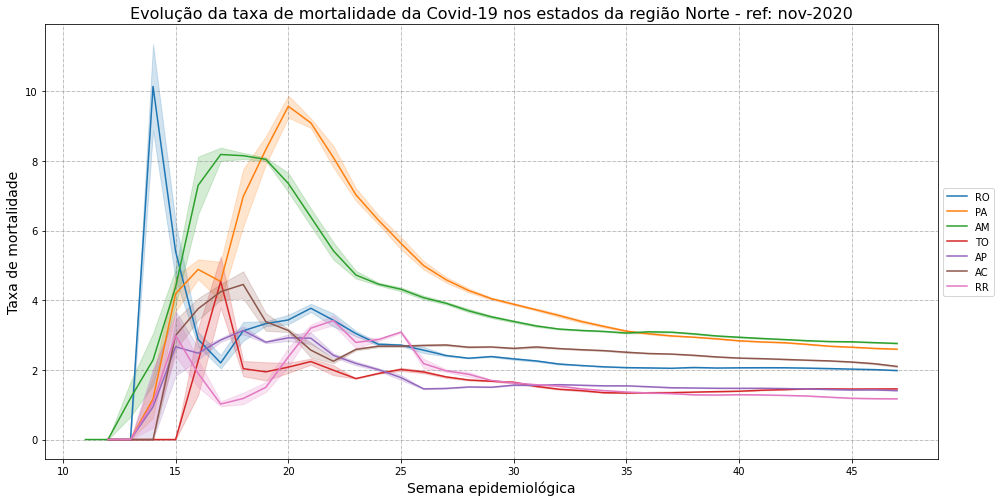

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Norte'").sort_values(by=['death_rate'], ascending=False), 'week_number_of_year', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Norte - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Taxa de mortalidade')

<font color='red'>Observação</font>
***
A fim de melhor a visualização dos dados sobre a taxa de mortalidade a figura abaixo foi alterada de semana epidemiológica para dias

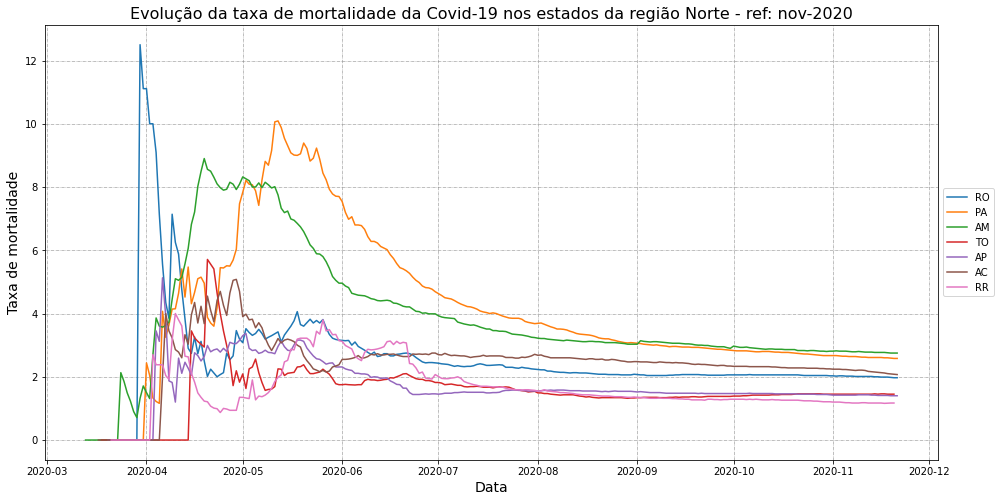

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Norte'").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Norte - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

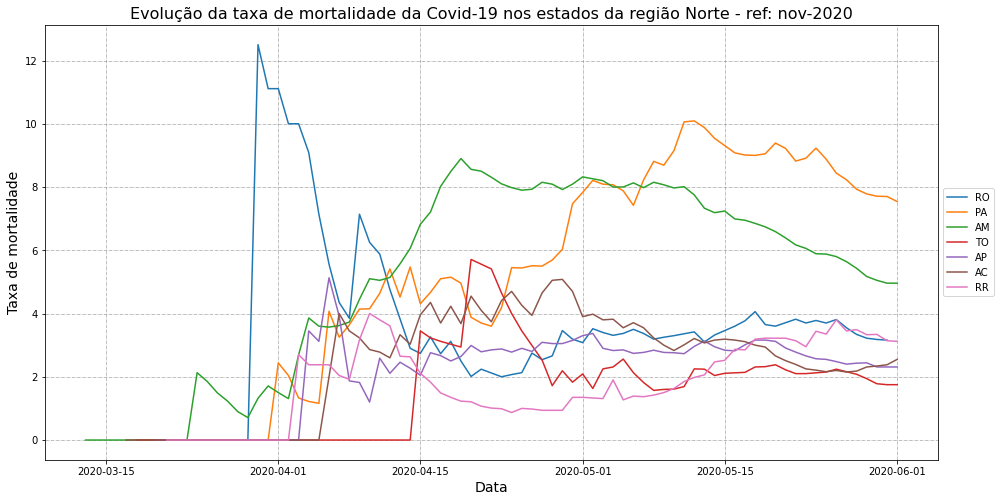

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Norte' and date <= '2020-06-01'").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Norte - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

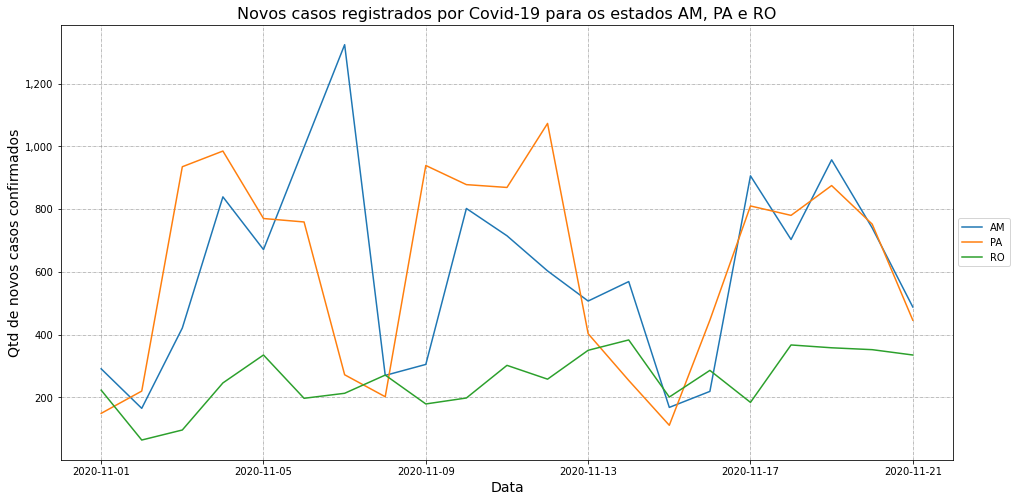

In [ ]:
print_line_plot(dados_covid_estados.query("state == ['PA','AM','RO'] and date >='2020-11-01'").sort_values(by=['new_cases'], ascending=False), 'date', 'new_cases', 'state', 'Novos casos registrados por Covid-19 para os estados AM, PA e RO', 'Data', 'Qtd de novos casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Os dois estados com maior número casos e mortes confirmadas são Pará (PA) e Amazonas (AM). Entretanto, o estado com a maior taxa de mortalidade é Rondônia (RO), que aparece em terceiro lugar no número de mortes da região Norte.
* A taxa de mortalidade da região Norte apresenta um comportamento semelhante a região Nordeste.
* O estado de Rondônia (RO) registrou a sua maior taxa de mortalidade logo no início da pandemia, antes da semana 15 (06.04.2020), depois sofreu uma queda e agora voltou a subir.
* Os estados do Pará (PA) e Amazonas (AM), estados com maior número de casos e mortes registradas, registraram as maiores taxas de mortalidade entre as semanas 15 (06.04.2020) e 20 (11.05.2020).
* O número de novos casos para os estados da Amazonas (AM) e Pará (PA) estão em ascensão.

<font color='salmon'>Respostas</font>
***
* O que aconteceu com o estado do PR para a sua taxa de mortalidade ser maior que a taxa de Santa Catarina (SC) e Rio Grande do Sul (RS)? **Na matéria abaixo é possível que ocorreram vários fatores que explicam a taxa de mortalidade do PR, mas o que me chamou a atenção foi a subnotificação da doença no Paraná.**

> [Paraná retardou chegada da 100ª morte: quanto tempo levará para chegar a mil?
](https://www.gazetadopovo.com.br/parana/comparacao-pr-outros-estados-100-mortes-covid-19/)

* Por que Santa Catarina (SC) tem a maior taxa de casos confirmados, mas a menor e número de mortes confirmadas?

> [Covid-19 em Santa Catarina: estado passa de 300 mil casos confirmados](https://g1.globo.com/sc/santa-catarina/noticia/2020/11/17/covid-19-em-santa-catarina-estado-passa-de-300-mil-casos-confirmados.ghtml)

<font color='grey'>Questionamentos</font>
***

* Será que o sistema de saúde entrou em colapso as semanas 15 (06.04.2020) e 20 (11.05.2020) e isso explica a alta taxa de mortalidade por Covid-19?

**Vamos analisar a seguir**
***
*  Os estados da região Centro-Oeste.

######Centro-Oeste

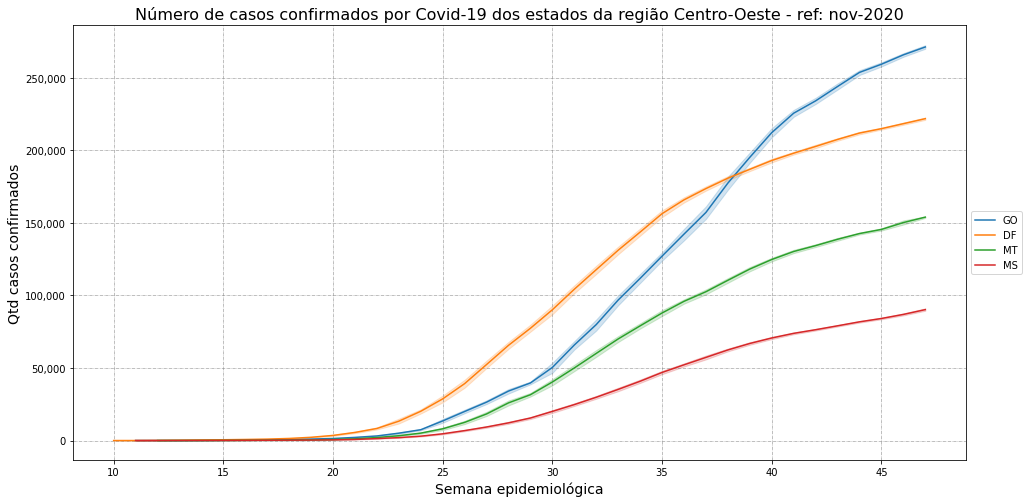

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Centro-Oeste'").sort_values(by=['confirmed'], ascending=False), 'week_number_of_year', 'confirmed', 'state', 'Número de casos confirmados por Covid-19 dos estados da região Centro-Oeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

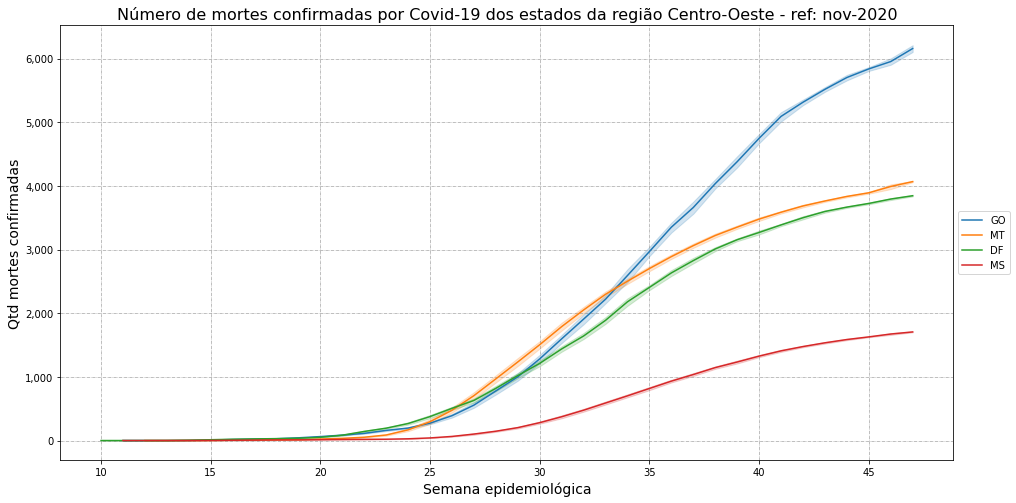

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Centro-Oeste'").sort_values(by=['deaths'], ascending=False), 'week_number_of_year', 'deaths', 'state', 'Número de mortes confirmadas por Covid-19 dos estados da região Centro-Oeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd mortes confirmadas')

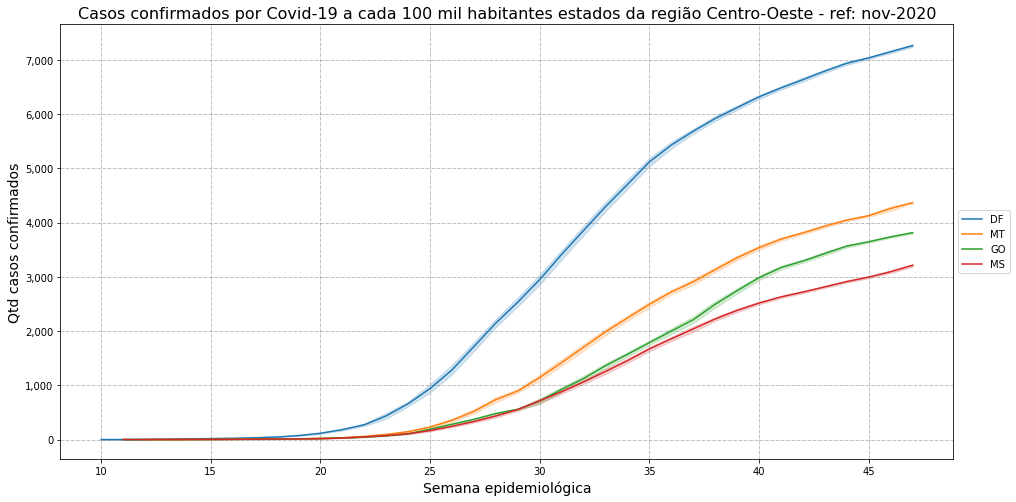

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Centro-Oeste'").sort_values(by=['confirmed_per_100k_inhabitants'], ascending=False), 'week_number_of_year', 'confirmed_per_100k_inhabitants', 'state', 'Casos confirmados por Covid-19 a cada 100 mil habitantes estados da região Centro-Oeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Qtd casos confirmados')

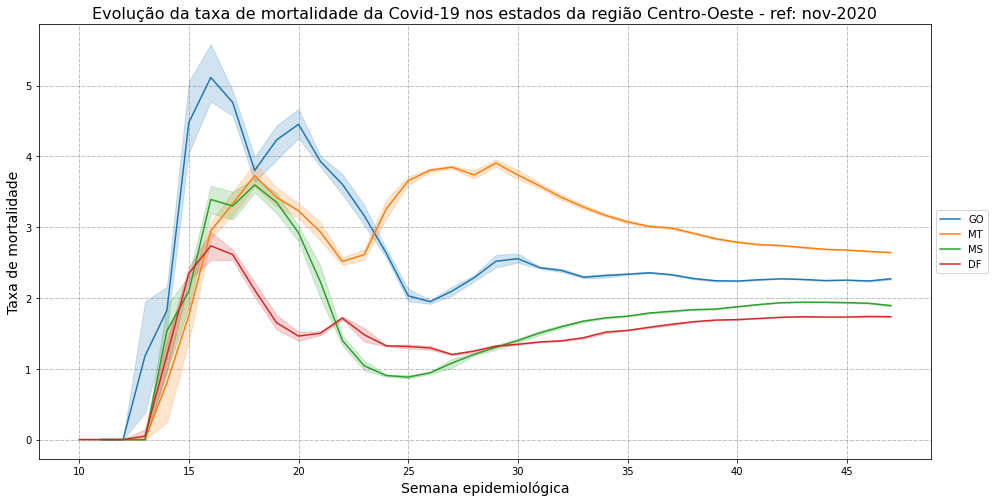

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Centro-Oeste'").sort_values(by=['death_rate'], ascending=False), 'week_number_of_year', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Centro-Oeste - ref: {}'.format(mes_ano_ref), 'Semana epidemiológica', 'Taxa de mortalidade')

<font color='red'>Observação</font>
***
A fim de melhor a visualização dos dados sobre a taxa de mortalidade a figura abaixo foi alterada de semana epidemiológica para dias


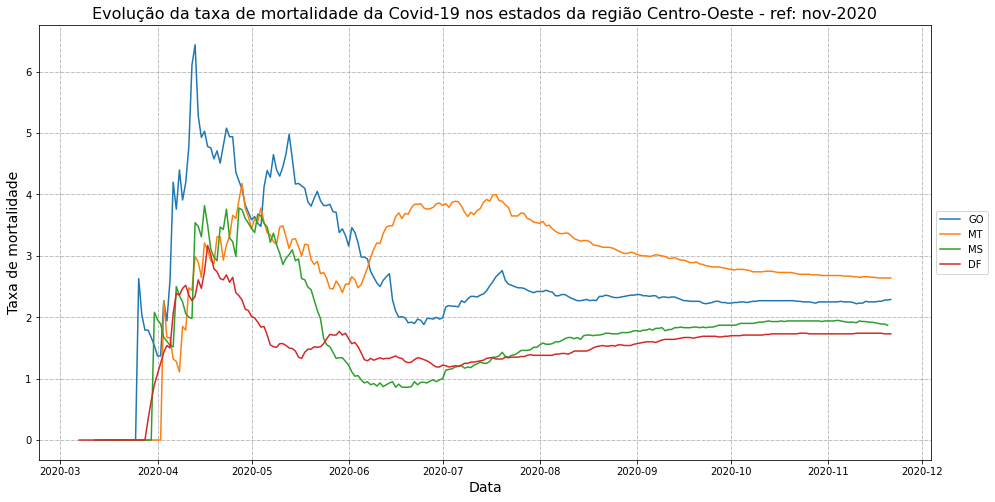

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Centro-Oeste'").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Centro-Oeste - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

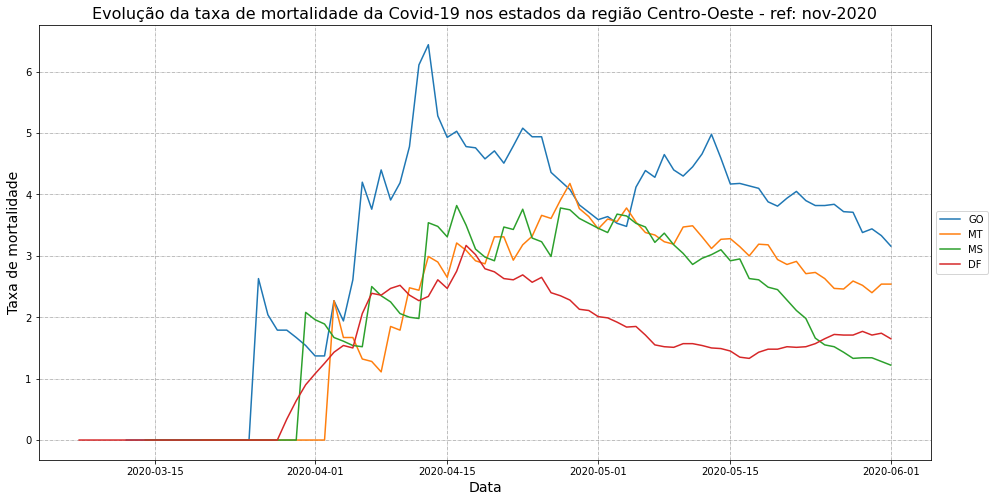

In [ ]:
print_line_plot(dados_covid_estados.query("regiao == 'Centro-Oeste' and date <= '2020-06-01' ").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Evolução da taxa de mortalidade da Covid-19 nos estados da região Centro-Oeste - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* O estado de Goiás (GO) é o estado com o maior número de casos confirmados, mortes confirmadas e taxa de mortalidade da região Centro-Oeste.
* O Distrito Federal (DF) é estado com maior número de casos registrados por 100 mil habitantes.

<font color='salmon'>Respostas</font>
***
* Será que o sistema de saúde entrou em colapso as semanas 15 (06.04.2020) e 20 (11.05.2020) e isso explica a alta taxa de mortalidade por Covid-19? Infelizmente o sistema de saúde entrou em colapso nos estados da região Norte e acarretou no grande número de mortes da região.

> [O colapso da saúde pública na região Norte do Brasil](https://esquerdaonline.com.br/2020/04/14/o-colapso-da-saude-publica-na-regiao-norte-do-brasil/)

> [Norte e Nordeste têm defasagem de leitos de UTI em relação às outras regiões do país](https://coronavirus.ufba.br/norte-e-nordeste-tem-defasagem-de-leitos-de-uti-em-relacao-outras-regioes-do-pais)

> [Norte e Nordeste têm cenários mais críticos para enfrentamento da covid-19](https://www.brasildefato.com.br/2020/05/07/norte-e-nordeste-tem-cenarios-mais-criticos-para-enfrentamento-da-covid-19)


<font color='grey'>Questionamentos</font>
***

* Por que o estado de Goiás (GO) concentra os piores números da região Centro-Oeste?

**Vamos analisar a seguir**
***
*  O estado de cada região que possuí o maior número de casos confirmados.
*  O estado de cada região que possuí o maior número de mortes confirmadas.
*  O estado de cada região que possuí o maior número de casos confirmados por 100 mil habitantes.
*  O estado de cada região que possuí a maior taxa de mortalidade.

#####Top 5 estados

######Número de casos confirmados

In [ ]:
# selecionando os estados através das função lista_ordenada_estados
selecao = lista_ordenada_estados(dados_covid_estados, 'confirmed', 'state', 1)

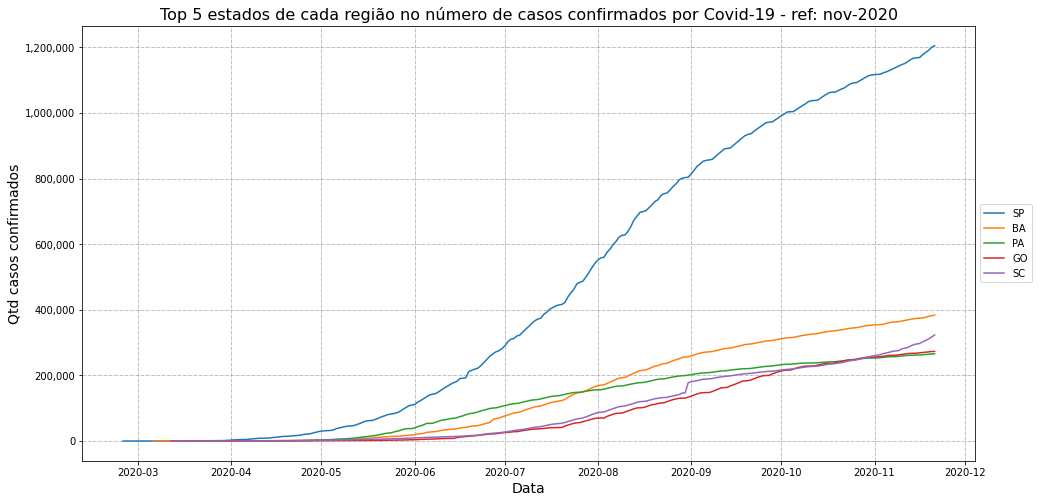

In [ ]:
print_line_plot(dados_covid_estados.query("state == @selecao").sort_values(by=['deaths'], ascending=False), 'date', 'confirmed', 'state', 'Top 5 estados de cada região no número de casos confirmados por Covid-19 - ref: {}'.format(mes_ano_ref), 'Data', 'Qtd casos confirmados')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Removendo o estado de São Paulo (SP), os outros estados possuem um comportamento semelhante no número de casos confirmados


######Número de mortes confirmadas

In [ ]:
# selecionando os estados através das função lista_ordenada_estados
selecao = lista_ordenada_estados(dados_covid_estados, 'deaths', 'state', 1)

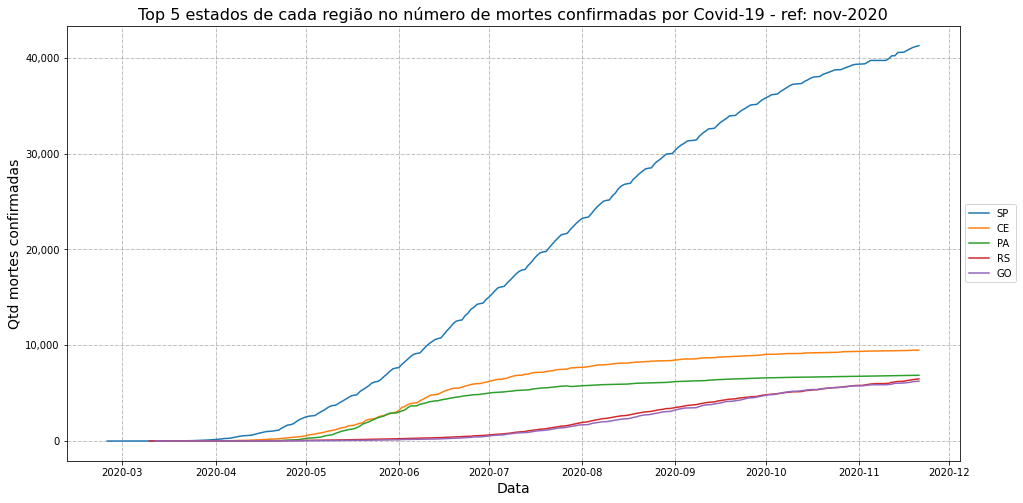

In [ ]:
print_line_plot(dados_covid_estados.query("state == @selecao").sort_values(by=['deaths'], ascending=False), 'date', 'deaths', 'state', 'Top 5 estados de cada região no número de mortes confirmadas por Covid-19 - ref: {}'.format(mes_ano_ref), 'Data', 'Qtd mortes confirmadas')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Os estados do Rio Grande do Sul (RS) e Goiás (GO) apresentam o mesmo comportamento na distribuição do número de mortes ao longo da pandemia por Covid-19. Lembrando que Goiás (GO) é o estado da região Centro-Oeste como maior número de casos confirmados enquanto o Rio Grande do Sul (RS) é segundo da região Sul.

######Número de mortes confirmadas por 100 mil habitantes

In [ ]:
# selecionando os estados através das função lista_ordenada_estados
selecao = lista_ordenada_estados(dados_covid_estados, 'confirmed_per_100k_inhabitants', 'state', 1)

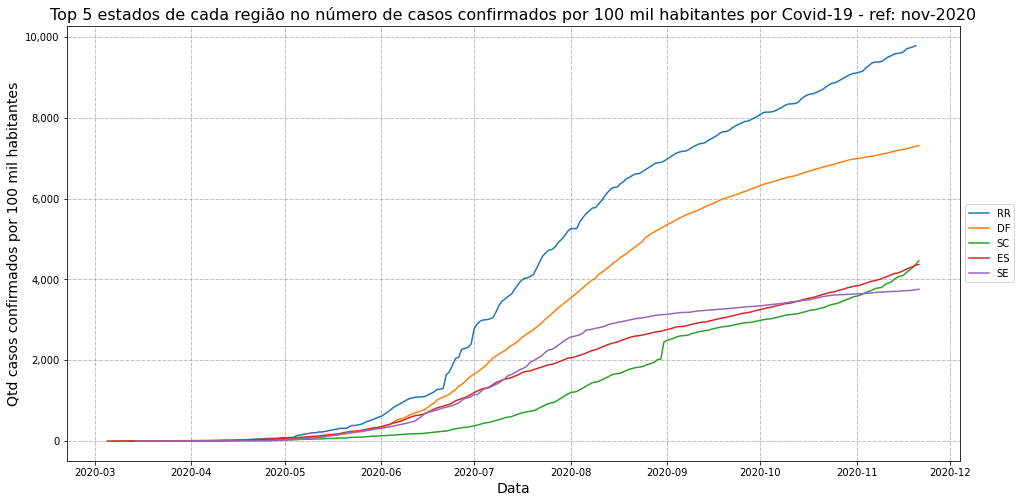

In [ ]:
print_line_plot(dados_covid_estados.query("state == @selecao").sort_values(by=['confirmed_per_100k_inhabitants'], ascending=False), 'date', 'confirmed_per_100k_inhabitants', 'state', 'Top 5 estados de cada região no número de casos confirmados por 100 mil habitantes por Covid-19 - ref: {}'.format(mes_ano_ref), 'Data', 'Qtd casos confirmados por 100 mil habitantes')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Pela primeira vez temos uma visualização sem o estado de São Paulo (SP), o representante da região Sudeste é o Espírito Santo (ES).


######Taxa de mortalidade

In [ ]:
# selecionando os estados através das função lista_ordenada_estados
selecao = lista_ordenada_estados(dados_covid_estados, 'death_rate', 'state', 1)

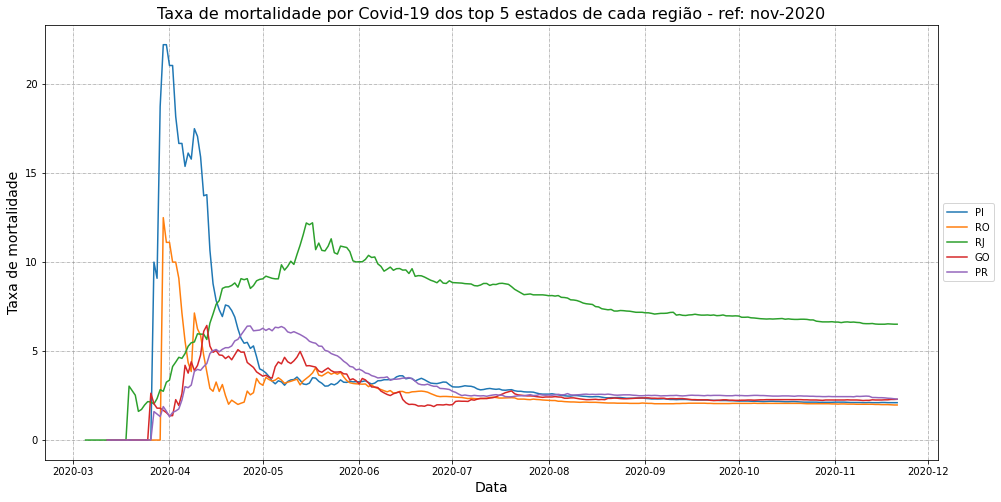

In [ ]:
print_line_plot(dados_covid_estados.query("state == @selecao").sort_values(by=['death_rate'], ascending=False), 'date', 'death_rate', 'state', 'Taxa de mortalidade por Covid-19 dos top 5 estados de cada região - ref: {}'.format(mes_ano_ref), 'Data', 'Taxa de mortalidade')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* Apesar do Piauí (PI) possuir uma taxa de casos confirmdados baixa, a sua taxa de mortalidade é mais alta de todos os os estados, seguido por Rondônia (RO) da região Norte.

######Novos casos confirmados

In [ ]:
# selecionando os estados através das função lista_ordenada_estados
selecao = lista_ordenada_estados(dados_covid_estados, 'new_cases', 'state', 1)

In [ ]:
dias_dataset = dados_covid_estados.drop_duplicates('date').sort_values(by=['date'], ascending=False).date.tolist()
quinze_dias_atras = dias_dataset[14]

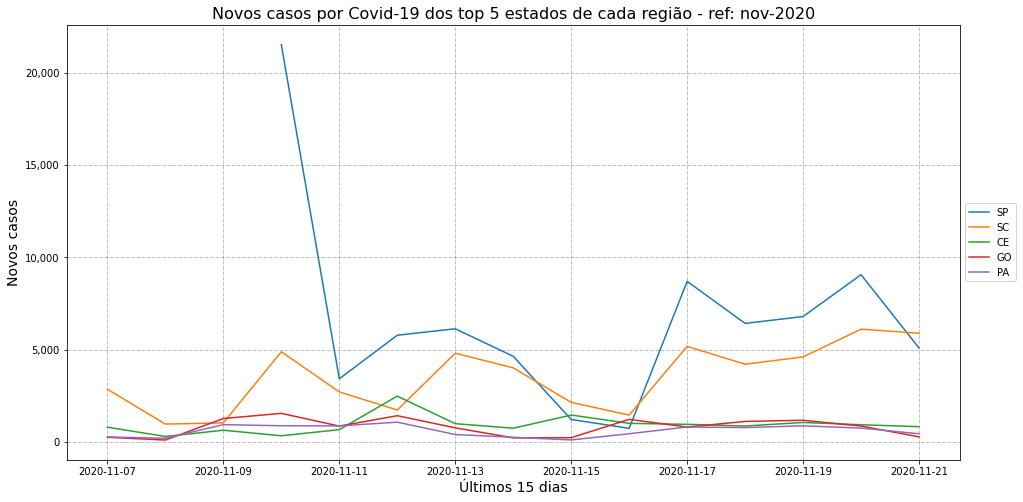

In [ ]:
print_line_plot(dados_covid_estados.query("state == @selecao and date >= @quinze_dias_atras ").sort_values(by=['new_cases'], ascending=False), 'date', 'new_cases', 'state', 'Novos casos por Covid-19 dos top 5 estados de cada região - ref: {}'.format(mes_ano_ref), 'Últimos 15 dias', 'Novos casos')

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar que:

* O estado de São Paulo (SP) tive um pico no número de novos casos confirmados nos últimos 15 dias.
* O estado de Santa Catarina (SC) também vem apresentando picos no número de casos confirmados.

##Conclusão da análise

Com base em todos os números analisados, podemos observar que algumas regiões e estados mais carentes sofreram e vêm sofrendo mais com a Covid-19 do que outras regiões e estados brasileiros.

No atual cenário que estamos, onde o número de casos vem aumentando a cada dia, os governantes devem estar atentos as medidas de prevenção e controle da COVID-19. Caso  não seja dada a devida importância, a segunda onda de Covid-19 será ainda mais potente, ocasionando ainda mais mortes nas regiões e estados afetadas pela primeira onda.

Enquanto aguardamos uma vacina, devemos utilizar o melhor recurso que temos: o bom senso através do isolamento social. 
